# Signaling Game Simulation Plots

## Requirements

In [45]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import *

import plots
import simulations
import utils

plt.style.use('seaborn-whitegrid')

## Load a simulation

In [46]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
simulation = simulations.load_simulation(simulation_name)
evaluations = simulation.evaluations

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


In [47]:
print(simulation.name)
print(f"Simulation message sizes: {list(evaluations.keys())}")
print(f"Number of trials per evaluation: {len(evaluations[2])}")

extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000
Simulation message sizes: [2]
Number of trials per evaluation: 20


## Available simulations

In [48]:
strict_context_simulations = {
    # O=5
    "Strict\nshared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Strict\nnon-shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    # O=3
    "Strict\nshared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",
    "Strict\nnon-shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",
}

non_strict_context_simulations = {
    # O=5
    "Non-strict\nshared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Non-Strict\nnon-shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Non-strict\nshared\nO=5, C=(15,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_15__mini_batch_size_128__num_batches_5000",
    "Non-strict\nnon-shared\nO=5, C=(15,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_15__mini_batch_size_128__num_batches_5000",
    "Non-strict\nshared\nO=5, C=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000",
    "Non-strict\nnon-shared\nO=5, C=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000",
    # O=3
    "Non-strict\nshared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",
    "Non-strict\nnon-shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",    
}

# Encoder input is <c, f(c)>

nature_includes_fc_simulations = {
    # O=5
    "F(c) input\nStrict\nshared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",
    "F(c) input\nStrict\nnon-shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",

    "F(c) input\nNon-strict\nshared\nO=5\nC=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_0__num_objects_5__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nnon-shared\nO=5\nC=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_0__num_objects_5__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nshared\nO=5\nC=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nnon-shared\nO=5\nC=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nshared\nO=5\nC=(15,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_0__num_objects_15__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nnon-shared\nO=5\nC=(15,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_0__num_objects_15__mini_batch_size_128__num_batches_5000",

    # O=3
    "F(c) input\nStrict\nshared\nO=3\nC=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
    "F(c) input\nStrict\nnon-shared\nO=3\nC=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
    
    "F(c) input\nNon-strict\nshared\nO=3\nC=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_0__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
    "F(c) input\nNon-strict\nnon-shared\nO=3\nC=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_0__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
}

# Untrained

untrained_simulations = {
    "Strict, shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_untrained__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_0",
    "Strict, shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_untrained__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_0",
}

## Available evaluations

In [7]:
print('\n'.join(evaluations[2][0].keys()))

training_losses
object_prediction_accuracy
detected_num_clusters
object_prediction_by_cluster_loss
clusterization_f_score
predictions_by_average_msg_loss
predictions_by_average_msg_accuracy
addition_compositionality_mean_message_loss
addition_compositionality_mean_message_cluster_accuracy
addition_compositionality_mean_prediction_loss
addition_compositionality_mean_prediction_accuracy
analogy_compositionality_net_message_mean_loss
analogy_compositionality_net_message_cluster_mean_accuracy
analogy_compositionality_net_prediction_mean_loss
analogy_compositionality_net_prediction_mean_accuracy
compositionality_net_message_mean_loss
compositionality_net_message_cluster_mean_accuracy
compositionality_net_prediction_mean_loss
compositionality_net_prediction_mean_accuracy
functions_from_messages
min_max_from_messages
dimension_from_messages
sanity_from_messages
object_by_context_from_messages
object_by_decoder_context_from_messages
context_from_messages
decoder_context_from_messages


## Helper functions

In [439]:
def get_evaluation_mean_and_err(simulation_name, evaluation_name, message_size, percents=False) -> float:
    simulation = simulations.load_simulation(simulation_name)
    vals = []
    for trial in simulation.evaluations[message_size]:
        vals.append(trial[evaluation_name])
    if percents:
        vals = np.array(vals) * 100
    return np.mean(vals), np.std(vals)

In [140]:
def plot_bars_for_evaluation(evaluation_name, display_names_to_simulation_names, title, y_label, width=18, msg_size=2):
    bar_width = 1
    num_simulation_sets = len(display_names_to_simulation_names)

    fig, ax = plt.subplots(num_simulation_sets, figsize=(width,8*num_simulation_sets))
    
    for i, (set_name, display_name_to_simulation) in enumerate(display_names_to_simulation_names.items()):
        for s, (display_name, file_name) in enumerate(display_name_to_simulation.items()):
            mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
            ax[i].bar(s, mean, yerr=err, capsize=10, color=f"C{i}", label=display_name)    

            ax[i].set_title(set_name)
            ax[i].set_xticks(range(len(display_name_to_simulation)))
            ax[i].set_xticklabels(display_name_to_simulation.keys())
            ax[i].set_ylabel(y_label)

    fig.suptitle(title, y=0.92, fontsize=15)
    plt.show()

In [235]:
def plot_bars_for_acl(evaluation_name, display_name_to_simulation, title, y_label, msg_size=2):
    fig, ax = plt.subplots(1, figsize=(6, 4))
    
    for s, (display_name, file_name) in enumerate(display_name_to_simulation.items()):
        mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
        ax.bar(s, mean, yerr=err, capsize=10, color=f"C{s}", label=display_name)    

        ax.set_xticks(range(len(display_name_to_simulation)))
        ax.set_xticklabels(display_name_to_simulation.keys())
        ax.set_ylabel(y_label)

    fig.suptitle(title, y=0.92, fontsize=15)
    plt.show()

In [226]:
def print_mean_err_for_evaluation(evaluation_name, display_names_to_simulation_names, message_size=2):
    for name, sim_name in display_names_to_simulation_names.items():
        mean, err = get_evaluation_mean_and_err(sim_name, evaluation_name, message_size)
        print(f"{name}:\n\tmean = {mean}\n\tstd = {err}\n")

## ACL Plots

In [49]:
#                 Shared  | non-shared
# Strict                
# Non-strict 5
# Non-strict 10
# Non-strict 15


cells = [
    ["acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"],
    
    ["acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000",
    "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000"],
    
    ["acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000", 
     "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"],
    
    ["acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_15__mini_batch_size_128__num_batches_5000",
    "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_15__mini_batch_size_128__num_batches_5000"]
]

cells = np.array(cells)

In [55]:
def plot_table(evaluation_name, cells, caption="", label="", percents=False, message_size=2):

    s=r"""
\begin{table}[]
\begin{tabular}{lcc}
\toprule
                       & \textbf{Shared} & \textbf{Non-shared} \\ \midrule
\textbf{Strict} & \\
\emph{10 objects} & 
	XX0,0  & XX0,1      \\ % \midrule
\textbf{Non-strict} & \\
\emph{5 objects} &
	XX1,0  & XX1,1      \\
%\textbf{Non-strict} & \\
\emph{10 objects} &
	XX2,0  & XX2,1      \\
\emph{15 objects} &
	XX3,0  & XX3,1      \\ \bottomrule
\end{tabular}
\caption{CAPTION}\label{tab:LABEL}
\end{table}
    """
    
    
    for idxs, x in np.ndenumerate(cells):
        mean, err = get_evaluation_mean_and_err(x, evaluation_name, message_size, percents)
        filler = "$" + f"{mean:.2f}" 
        filler += r'\%' if percents else ''
        filler += r"\pm " + f"{err:.2f}" + "$"
        s = s.replace(F"XX{idxs[0]},{idxs[1]}", filler)
        s = s.replace("LABEL", label)
        s = s.replace("CAPTION", caption)

    print(s)
    
    
def plot_compositionality_table(evaluation_names, cells, caption="", label="", percents=False, message_size=2):

    s=r"""
\begin{table}[hbt!]
\begin{tabular}{lcccc}
\toprule
                       & \multicolumn{2}{c}{\textbf{Compositionality by Addition}} & \multicolumn{2}{c}{\textbf{Composition Network}} \\ \midrule
                       & \textbf{Shared} & \textbf{Non-shared} & \textbf{Shared} & \textbf{Non-shared} \\ \midrule
\textbf{Strict} & \\ 
\emph{10 objects} &  XX0,0  & XX0,1 &  YY0,0  & YY0,1      \\ % \midrule
\textbf{Non-strict} & \\
\emph{5 objects} &
	XX1,0  & XX1,1 &  YY1,0  & YY1,1      \\
%\textbf{Non-strict} & \\
\emph{10 objects} &
	XX2,0  & XX2,1 &  YY2,0  & YY2,1     \\
\emph{15 objects} &
	XX3,0  & XX3,1 &  YY3,0  & YY3,1     \\ \bottomrule
\end{tabular}
\caption{CAPTION}\label{tab:LABEL}
\end{table}
    """
    
    
    for idxs, x in np.ndenumerate(cells):
        mean1, err1 = get_evaluation_mean_and_err(x, evaluation_names[0], message_size, percents)
        mean2, err2 = get_evaluation_mean_and_err(x, evaluation_names[1], message_size, percents)
        filler = "$" + f"{mean1:.2f}" 
        filler += r'\%' if percents else ''
        filler += r"\pm " + f"{err1:.2f}" + "$"
        
        filler2 = "$" + f"{mean2:.2f}" 
        filler2 += r'\%' if percents else ''
        filler2 += r"\pm " + f"{err2:.2f}" + "$"
        
        s = s.replace(F"XX{idxs[0]},{idxs[1]}", filler)
        s = s.replace(F"YY{idxs[0]},{idxs[1]}", filler2)
        
        s = s.replace("LABEL", label)
        s = s.replace("CAPTION", caption)

    print(s)
    
plot_compositionality_table(["addition_compositionality_mean_prediction_accuracy", 
                             "analogy_compositionality_net_prediction_mean_accuracy"],
                           cells,
                           "CAPTION",
                           "LABEL", percents=True)


plot_compositionality_table(["addition_compositionality_mean_prediction_loss", 
                             "analogy_compositionality_net_prediction_mean_loss"],
                           cells,
                           "Lossess",
                           "composition_mse_losses", percents=False)


\begin{table}[hbt!]
\begin{tabular}{lcccc}
\toprule
                       & \multicolumn{2}{c}{\textbf{Compositionality by Addition}} & \multicolumn{2}{c}{\textbf{Composition Network}} \\ \midrule
                       & \textbf{Shared} & \textbf{Non-shared} & \textbf{Shared} & \textbf{Non-shared} \\ \midrule
\textbf{Strict} & \\ 
\emph{10 objects} &  $7.82\%\pm 2.40$  & $11.94\%\pm 2.13$ &  $13.70\%\pm 6.85$  & $10.18\%\pm 6.15$      \\ % \midrule
\textbf{Non-strict} & \\
\emph{5 objects} &
	$16.86\%\pm 3.23$  & $17.14\%\pm 3.54$ &  $15.10\%\pm 2.05$  & $14.35\%\pm 2.74$      \\
%\textbf{Non-strict} & \\
\emph{10 objects} &
	$5.82\%\pm 2.37$  & $6.46\%\pm 1.79$ &  $5.00\%\pm 2.62$  & $5.92\%\pm 2.12$     \\
\emph{15 objects} &
	$3.72\%\pm 1.42$  & $4.00\%\pm 1.54$ &  $1.59\%\pm 1.31$  & $2.48\%\pm 1.05$     \\ \bottomrule
\end{tabular}
\caption{CAPTION}\label{tab:LABEL}
\end{table}
    

\begin{table}[hbt!]
\begin{tabular}{lcccc}
\toprule
                       & \multicolumn{2}{c}

In [426]:
def plot_table_bars(evaluation_name, cells, title, y_label, y_min, y_max=None, percents=False, message_size=2):
    plt.style.use('seaborn-whitegrid')
    num_ticks = 5
    fig, ax = plt.subplots(cells.shape[0], cells.shape[1], figsize=(7,10))
    
    
    global_max = float("-inf")
    
    for row in range(cells.shape[0]):
        for col in range(cells.shape[1]):
            mean, err = get_evaluation_mean_and_err(cells[row,col], evaluation_name, message_size)
            global_max = max(global_max, mean)
            
            ax_ = ax[row,col]
            ax_.bar([0], mean, yerr=err, capsize=10, color="cornflowerblue")
            ax_.set_xticks([])
            ax_.set_xticklabels([])
#             ax_.set_ylabel(y_label)
    
    y_max = y_max or global_max
    
    y_interval = round(
        y_max / num_ticks, int(np.abs(np.floor(np.log10(y_max / num_ticks))))
    )
    y_ticks = [round(x, 1) for x in np.arange(0.0, y_max + y_interval, y_interval)]
    y_tick_labels = [str(x) for x in y_ticks]
    if percents:
        y_tick_labels = [str(int(x*100)) + "%" for x in y_ticks]
    
    for _, curr_ax in np.ndenumerate(ax):
        curr_ax.set_yticks(y_ticks)
        curr_ax.set_yticklabels(y_tick_labels)

#     fig.suptitle(title, fontsize=18, y=0.98)
    
    fig.text(0.31,0.9, "Shared context", fontsize=16, horizontalalignment='center')
    fig.text(0.72,0.9, "Non-shared context", fontsize=16, horizontalalignment='center')
    
    fig.text(-0.02,0.8, "Strict", fontsize=16, horizontalalignment='center')
    fig.text(-0.02,0.6, "Non-strict,\n5 objects", fontsize=16, horizontalalignment='center')
    fig.text(-0.02,0.4, "Non-strict,\n10 objects", fontsize=16, horizontalalignment='center')
    fig.text(-0.02,0.2, "Non-strict,\n15 objects", fontsize=16, horizontalalignment='center')
    plt.show()

### Compositionality accuracy drop

In [58]:
def get_performance_drop(evaluation_names):
    eval_means = [[get_evaluation_mean_and_err(str(simulation_name), x, message_size=2)[0] for x in evaluation_names] 
                  for simulation_name in np.nditer(cells)]
    print("\t\t", eval_means)

    decreases = [(x[0]-x[1]) for x in eval_means]

    for sim, decrease in zip(np.nditer(cells), decreases):
        print(f"{sim}:\n\t", decrease, "%\n")
    print("Min:", min(decreases))

print(f"Addition network")
get_performance_drop(["object_prediction_accuracy", "addition_compositionality_mean_prediction_accuracy"])

print(f"Compositionality network")
get_performance_drop(["object_prediction_accuracy", "compositionality_net_prediction_mean_accuracy"])

Addition network
		 [[0.6378, 0.07817500000000002], [0.6022000000000001, 0.11942499999999998], [0.4936999999999999, 0.16857500000000003], [0.43550000000000005, 0.17135000000000003], [0.3306, 0.05822499999999999], [0.31884999999999997, 0.064625], [0.27580000000000005, 0.03715], [0.27945, 0.04000000000000001]]
acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000:
	 0.559625 %

acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000:
	 0.48277500000000007 %

acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000:
	 0.3251249999999999 %

acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects

### Compositionality Appendix Tables

In [50]:
plot_table("addition_compositionality_mean_prediction_accuracy", cells, caption="addition_compositionality_mean_prediction_accuracy ", label="addition_compositionality_accuracy", percents=True)


\begin{table}[]
\begin{tabular}{lcc}
\toprule
                       & \textbf{Shared} & \textbf{Non-shared} \\ \midrule
\textbf{Strict} & \\
\emph{10 objects} & 
	$7.82\%\pm 2.40$  & $11.94\%\pm 2.13$      \\ % \midrule
\textbf{Non-strict} & \\
\emph{5 objects} &
	$16.86\%\pm 3.23$  & $17.14\%\pm 3.54$      \\
%\textbf{Non-strict} & \\
\emph{10 objects} &
	$5.82\%\pm 2.37$  & $6.46\%\pm 1.79$      \\
\emph{15 objects} &
	$3.72\%\pm 1.42$  & $4.00\%\pm 1.54$      \\ \bottomrule
\end{tabular}
\caption{addition_compositionality_mean_prediction_accuracy }\label{tab:addition_compositionality_accuracy}
\end{table}
    


In [51]:
plot_table("analogy_compositionality_net_prediction_mean_accuracy", cells, caption="addition_compositionality_mean_prediction_accuracy ", label="addition_compositionality_accuracy", percents=True)


\begin{table}[]
\begin{tabular}{lcc}
\toprule
                       & \textbf{Shared} & \textbf{Non-shared} \\ \midrule
\textbf{Strict} & \\
\emph{10 objects} & 
	$13.70\%\pm 6.85$  & $10.18\%\pm 6.15$      \\ % \midrule
\textbf{Non-strict} & \\
\emph{5 objects} &
	$15.10\%\pm 2.05$  & $14.35\%\pm 2.74$      \\
%\textbf{Non-strict} & \\
\emph{10 objects} &
	$5.00\%\pm 2.62$  & $5.92\%\pm 2.12$      \\
\emph{15 objects} &
	$1.59\%\pm 1.31$  & $2.48\%\pm 1.05$      \\ \bottomrule
\end{tabular}
\caption{addition_compositionality_mean_prediction_accuracy }\label{tab:addition_compositionality_accuracy}
\end{table}
    


### Object Prediciton Accuracy

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


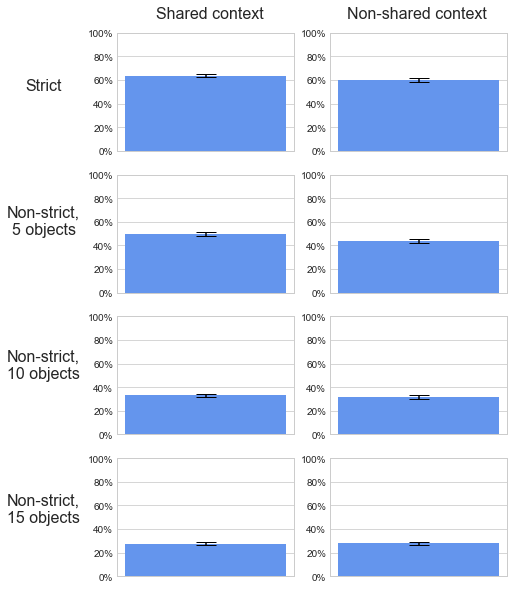

In [422]:
plot_table_bars("object_prediction_accuracy", cells, "Object Prediction Accuracy", "Accuracy", percents=True, y_min=0, y_max=1.0)

In [455]:
plot_table("clusterization_f_score", cells, caption="Message clusterization F1 scores. ", label="f1_scores", percents=False)


\begin{table}[]
\begin{tabular}{l|c|c}
\hline
                       & \textbf{Shared} & \textbf{Non-shared} \\ \hline
\textbf{\begin{tabular}[c]{@{}l@{}}Strict \\ context \end{tabular}}                 & $1.00\pm 0.00$  & $0.90\pm 0.09$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 5 objects\end{tabular}}  & $0.99\pm 0.02$  & $0.54\pm 0.15$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 10 objects\end{tabular}} & $1.00\pm 0.00$  & $0.99\pm 0.01$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 15 objects\end{tabular}} & $1.00\pm 0.00$  & $1.00\pm 0.00$      \\ \hline
\end{tabular}
\label{tab:f1_scores}
\caption{Message clusterization F1 scores. }
\end{table}



In [456]:
plot_table("predictions_by_average_msg_accuracy", cells, caption="Object prediction accuracy using average message from each function cluster. ", label="average_message_accuracy", percents=True)


\begin{table}[]
\begin{tabular}{l|c|c}
\hline
                       & \textbf{Shared} & \textbf{Non-shared} \\ \hline
\textbf{\begin{tabular}[c]{@{}l@{}}Strict \\ context \end{tabular}}                 & $63.39\%\pm 1.45$  & $55.37\%\pm 3.43$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 5 objects\end{tabular}}  & $46.94\%\pm 1.70$  & $29.40\%\pm 5.59$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 10 objects\end{tabular}} & $32.63\%\pm 1.43$  & $31.51\%\pm 1.62$      \\\hline
\textbf{\begin{tabular}[c]{@{}l@{}}Non-strict, \\ 15 objects\end{tabular}} & $28.24\%\pm 1.11$  & $27.94\%\pm 1.20$      \\ \hline
\end{tabular}
\label{tab:average_message_accuracy}
\caption{Object prediction accuracy using average message from each function cluster. }
\end{table}



/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


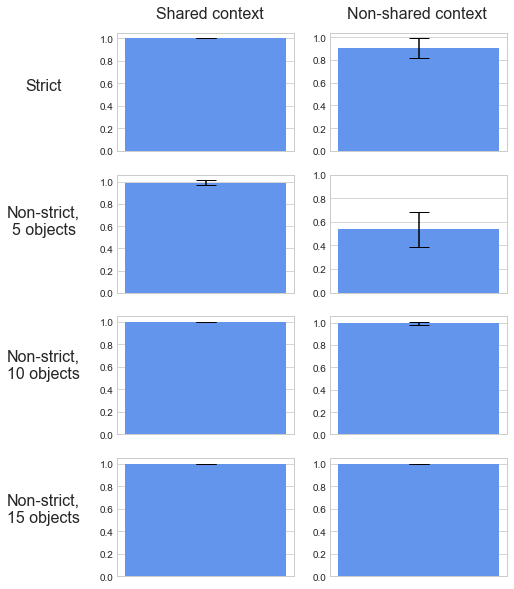

In [423]:
plot_table_bars("clusterization_f_score", cells, "Object Prediction Accuracy", "Accuracy", percents=False, y_min=0, y_max=1.0)

## General prediction accuracy
Test whether predicted object is closest to target object.

Method: Take network's predicted object, find closest object in input context C (using MSE), check if closest object is the target object.

In [179]:
simulation_sets = {"Strict context": strict_context_simulations, 
                   "Non-strict": non_strict_context_simulations, 
                   "F(c) input": nature_includes_fc_simulations,
                  "Untrained networks": untrained_simulations}

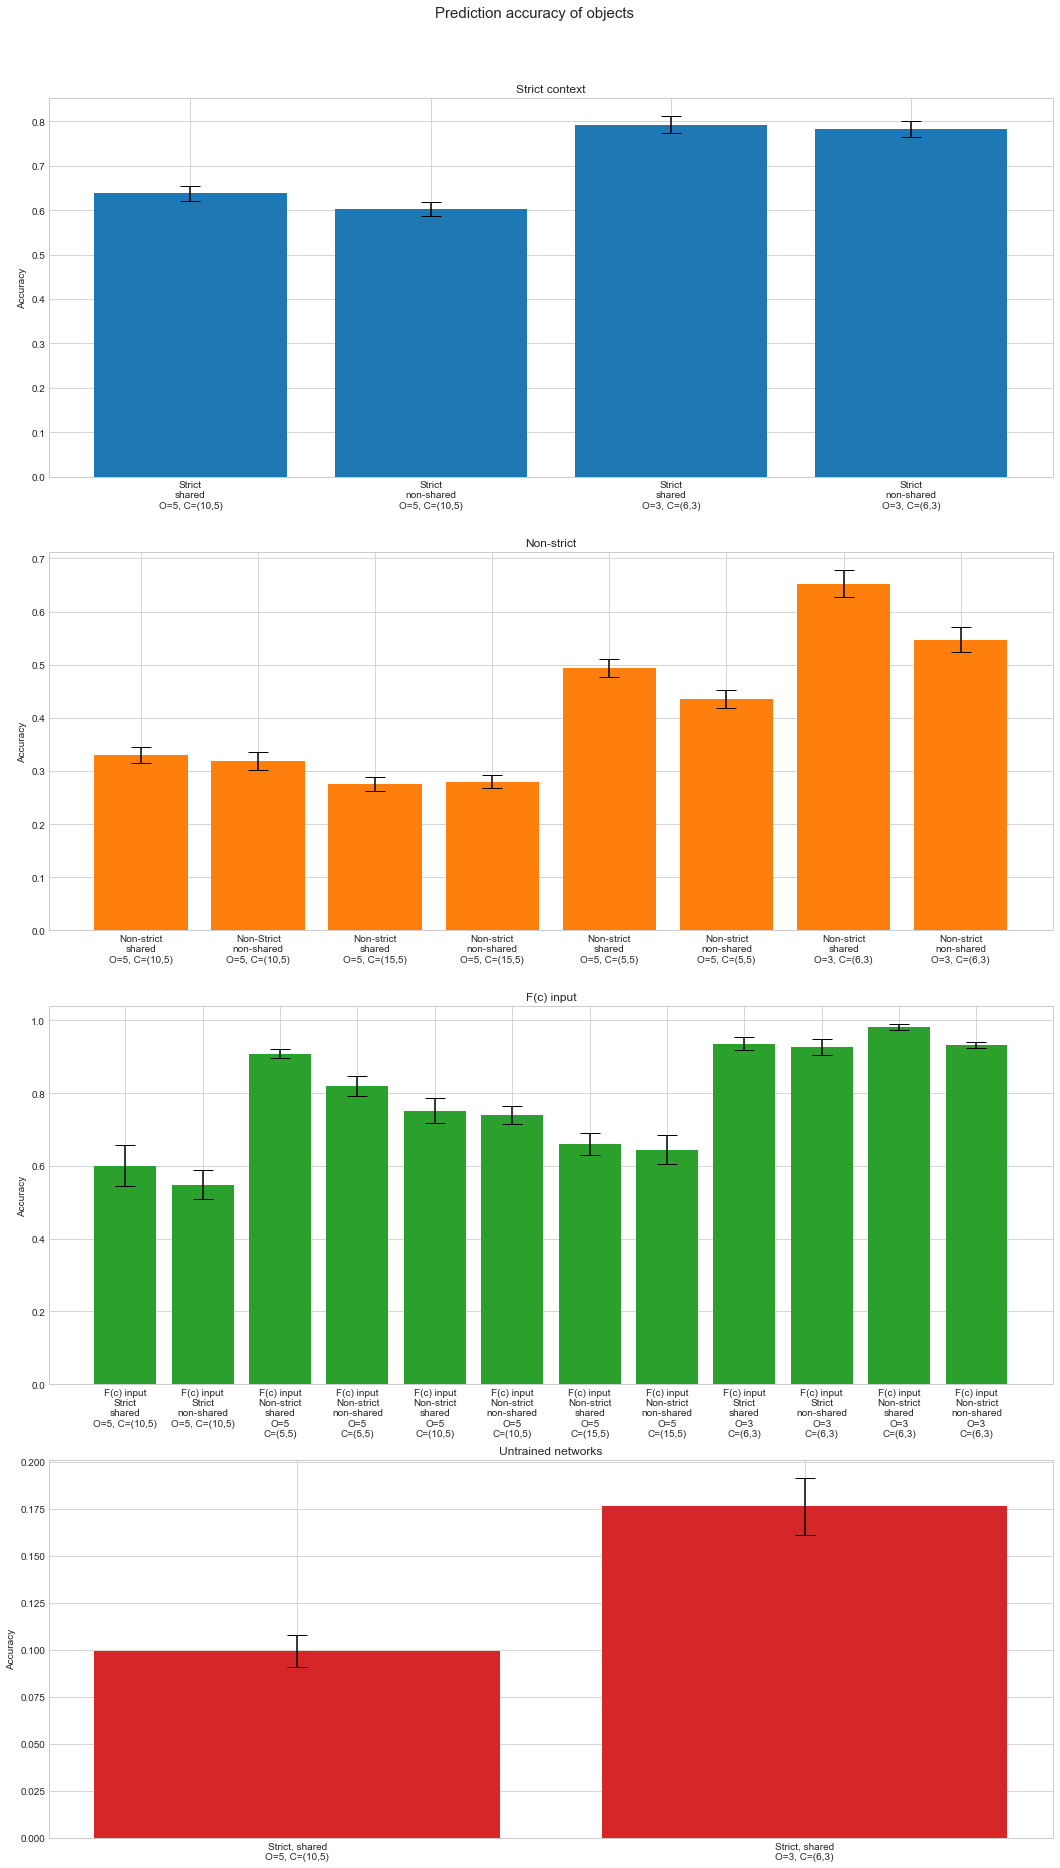

In [180]:
plot_bars_for_evaluation("object_prediction_accuracy", simulation_sets, "Prediction accuracy of objects", "Accuracy")

## Predictions from M

Method: a simple neural network (hidden layer size 32 * ReLU) is trained to predict the various game elements from the messages M.
For one-hot objects (i.e. F) an accuracy measure can be used. For the other elements, which are continuous, MSE is used. 

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


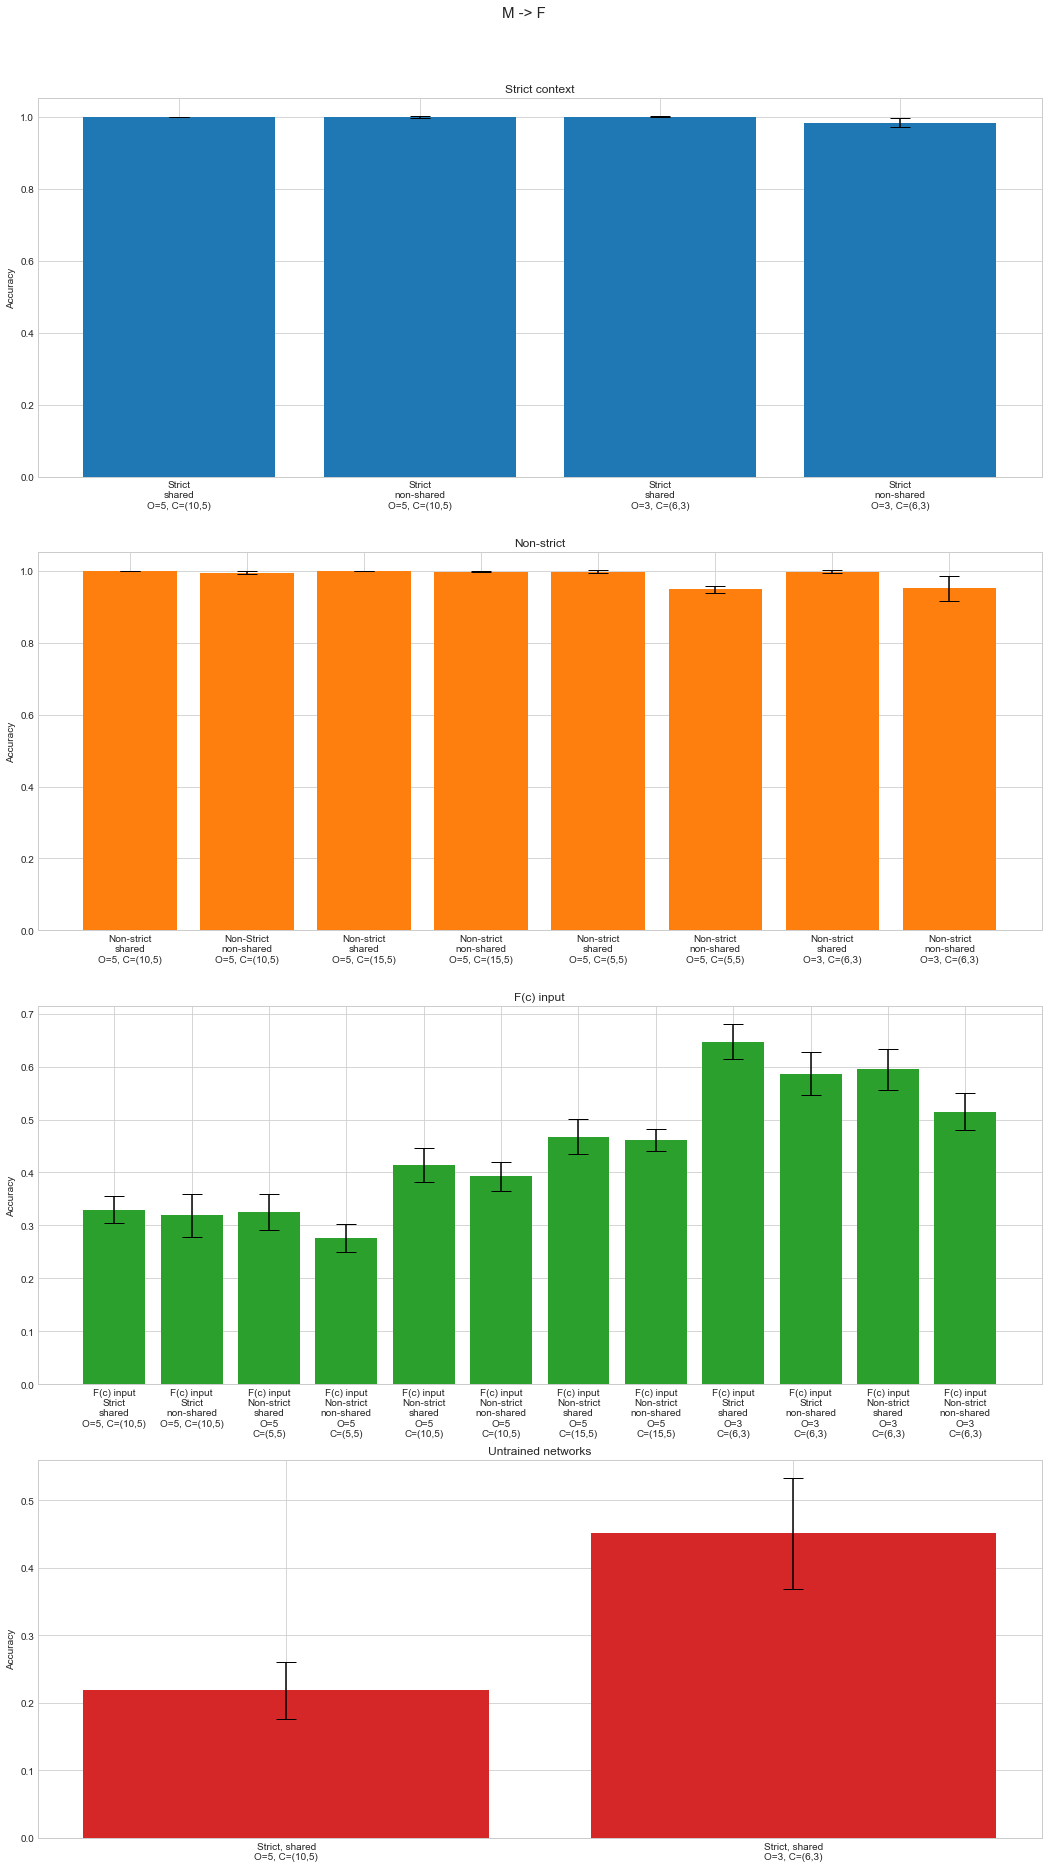

In [178]:
plot_bars_for_evaluation("functions_from_messages", simulation_sets, "M -> F", "Accuracy")

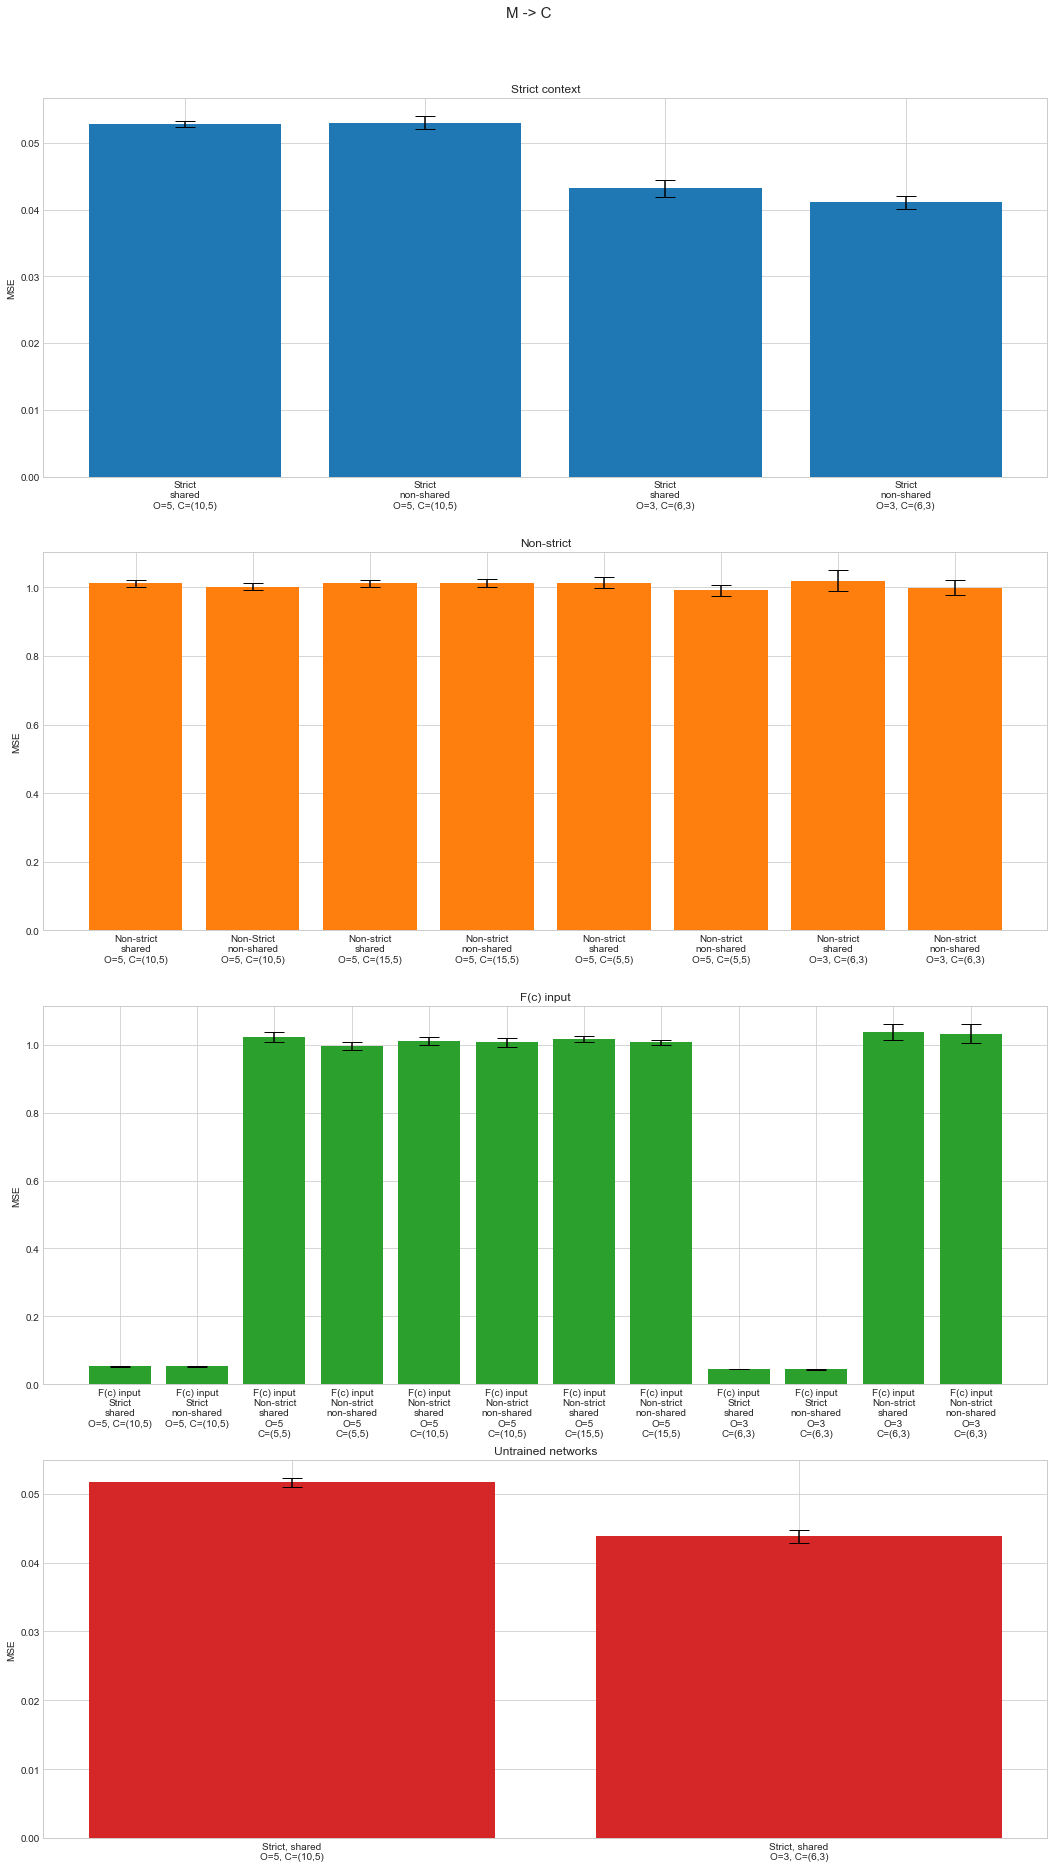

In [143]:
plot_bars_for_evaluation("context_from_messages", simulation_sets, "M -> C", "MSE")

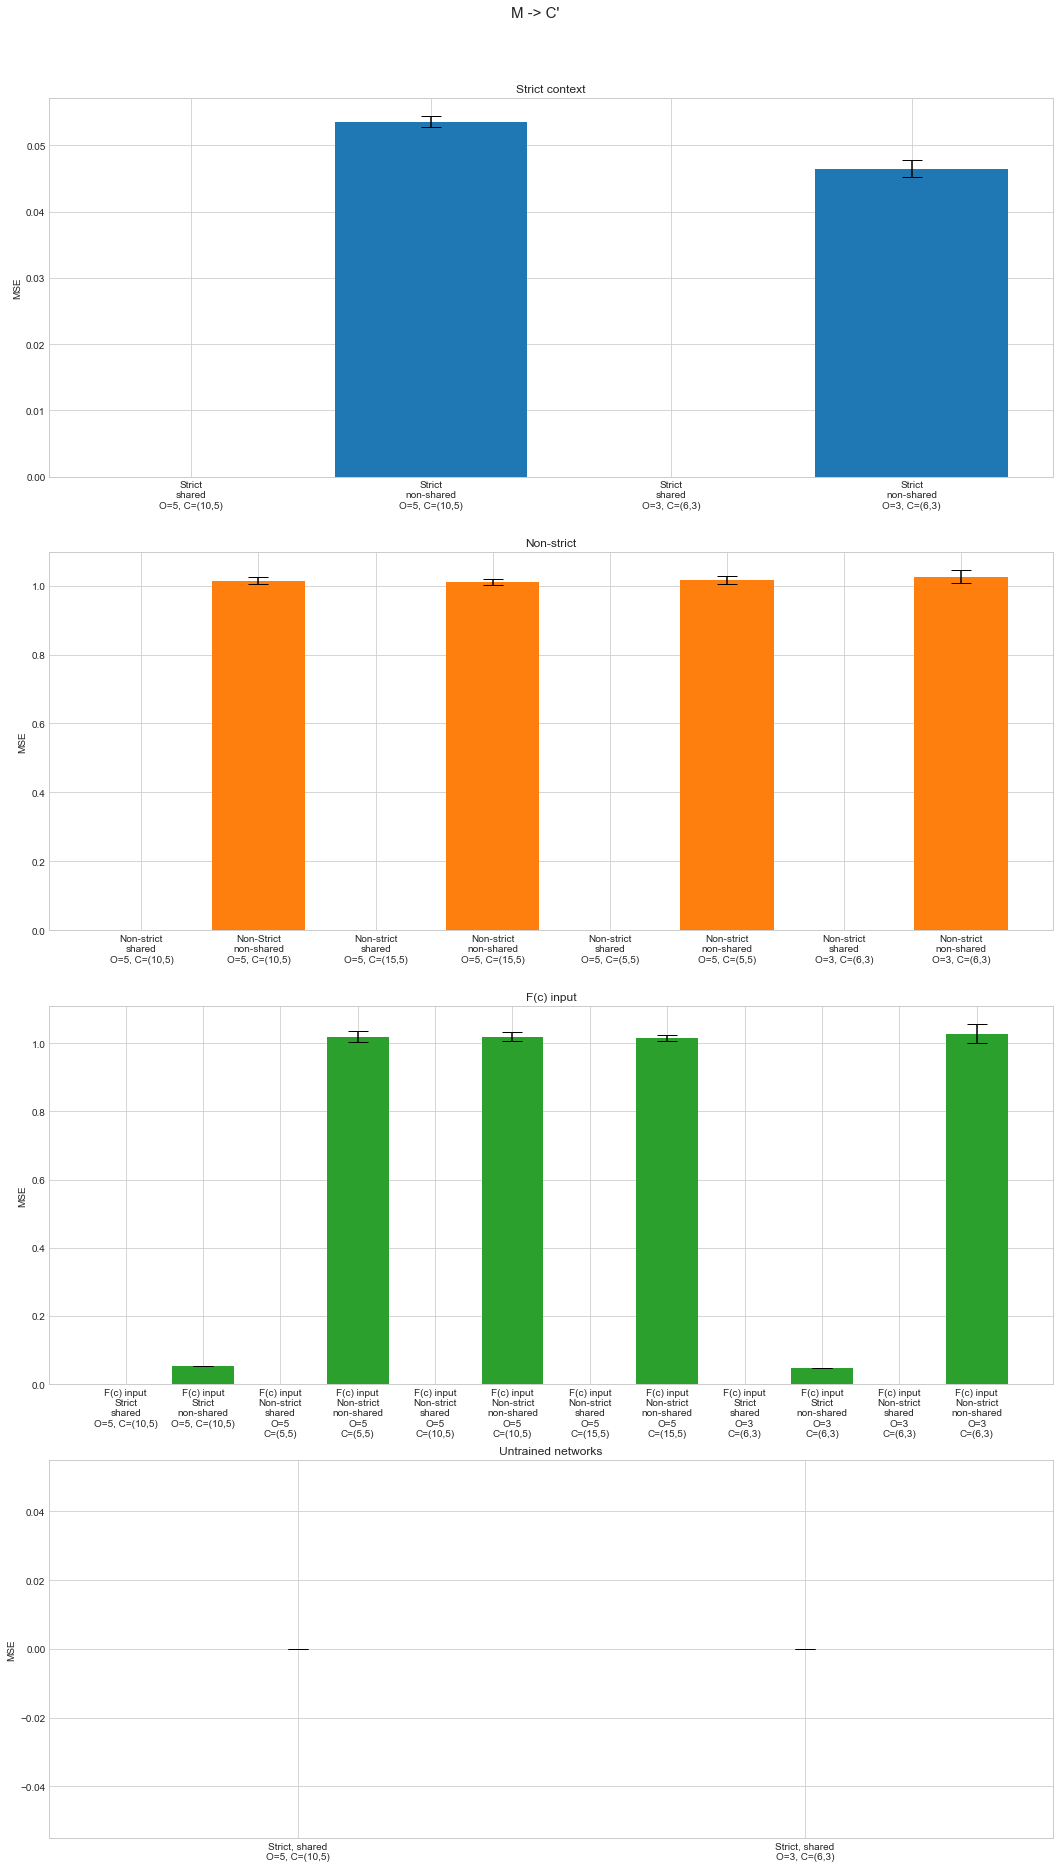

In [144]:
plot_bars_for_evaluation("decoder_context_from_messages", simulation_sets, "M -> C'", "MSE")

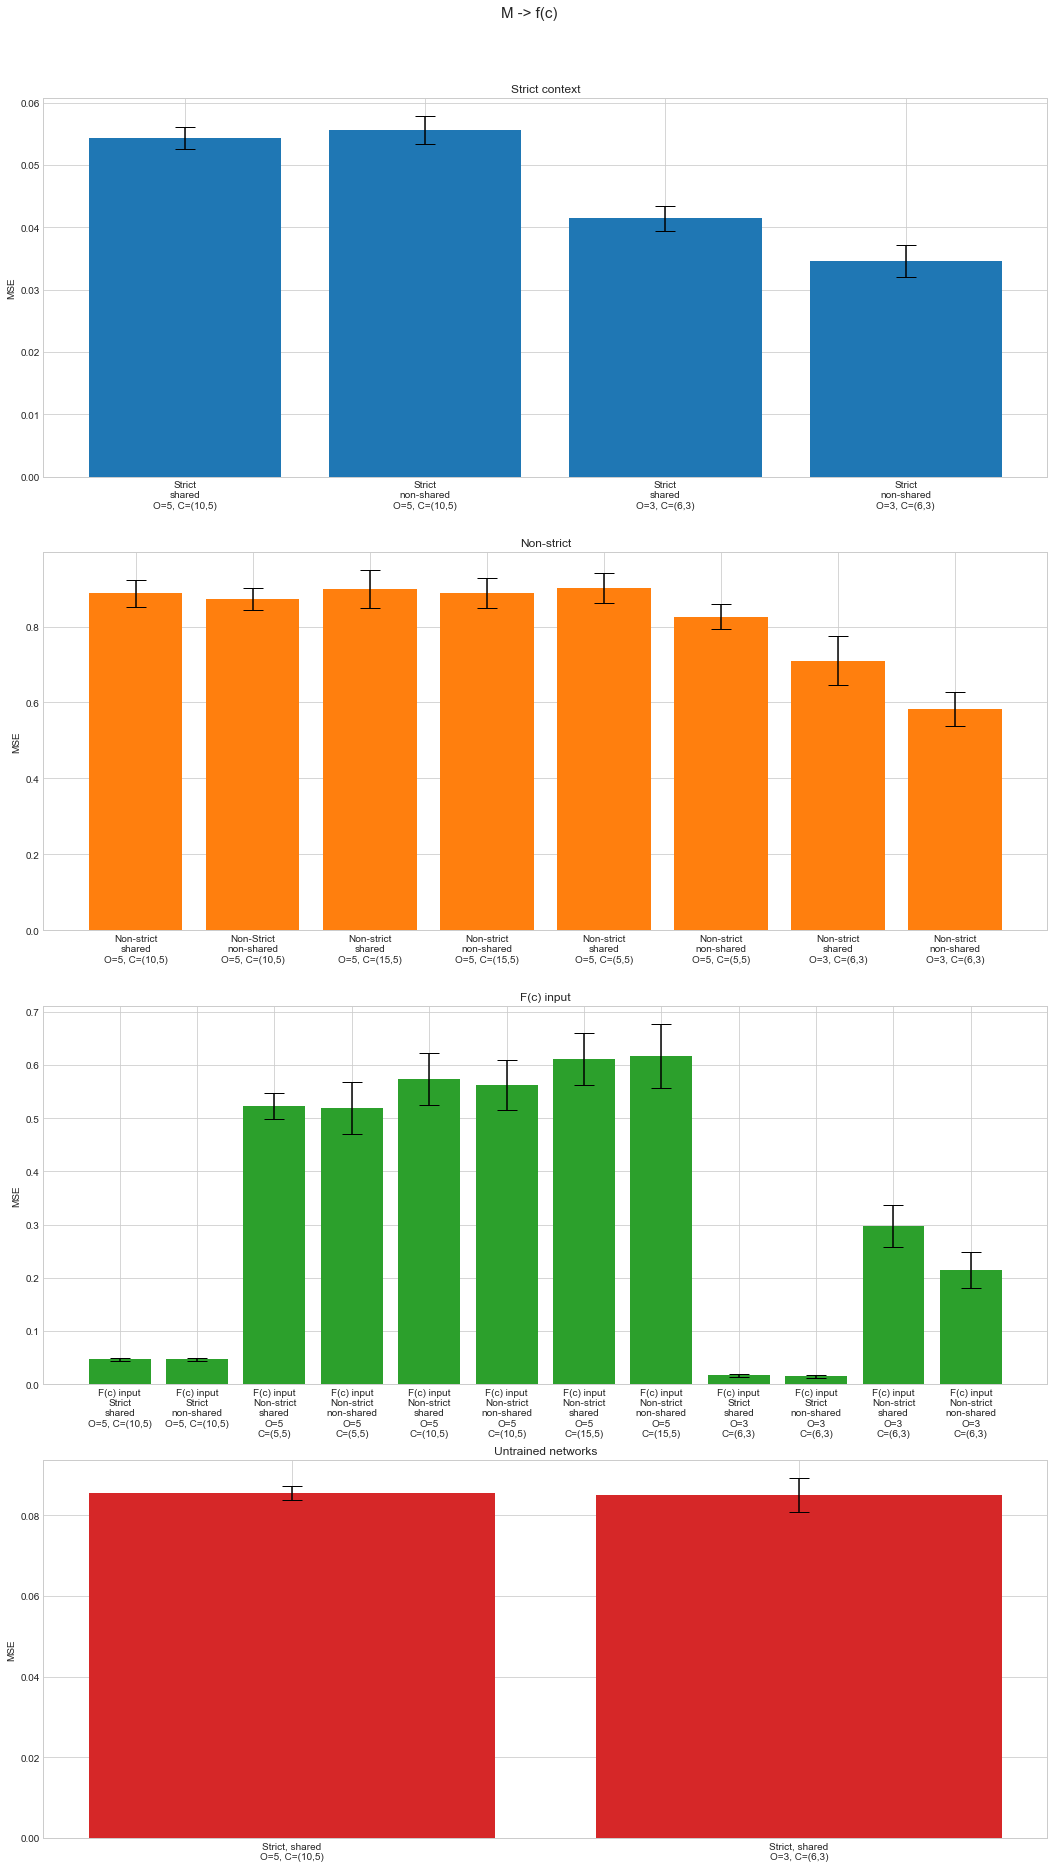

In [145]:
plot_bars_for_evaluation("object_by_context_from_messages", simulation_sets, "M -> f(c)", "MSE")

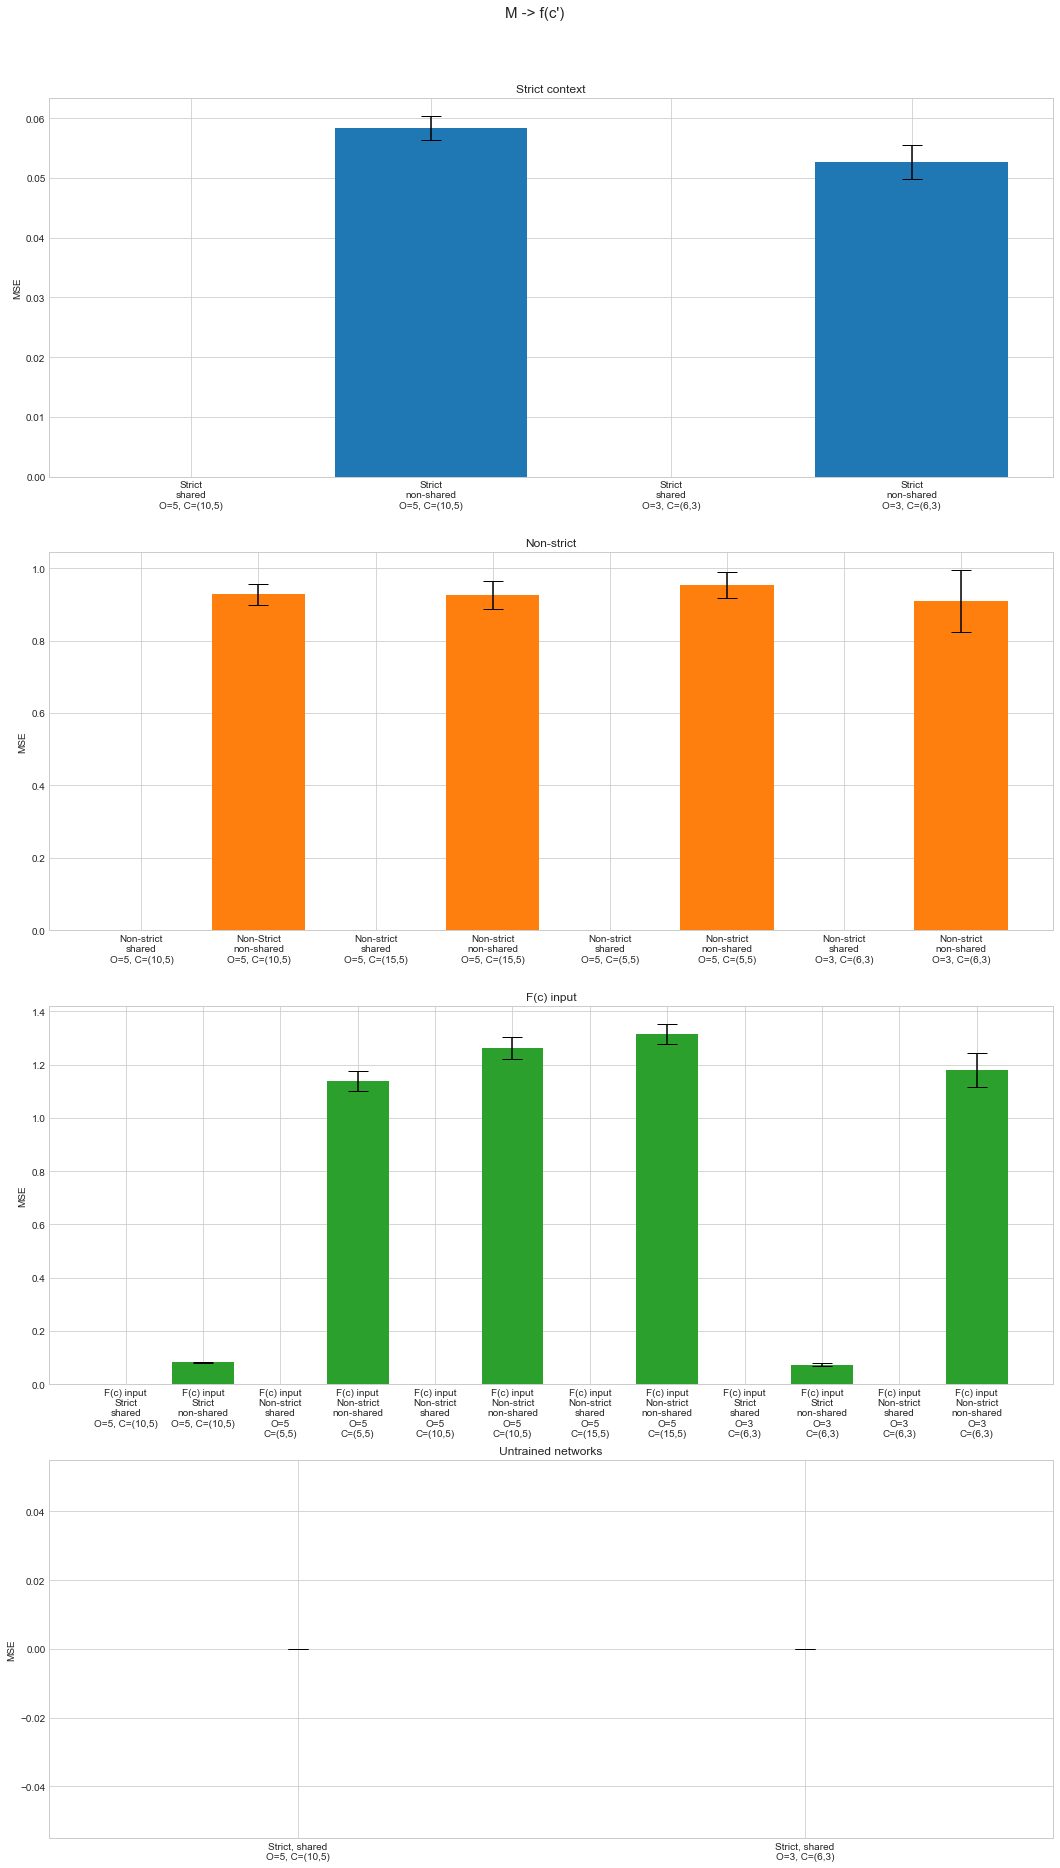

In [147]:
plot_bars_for_evaluation("object_by_decoder_context_from_messages", simulation_sets, "M -> f(c')", "MSE")

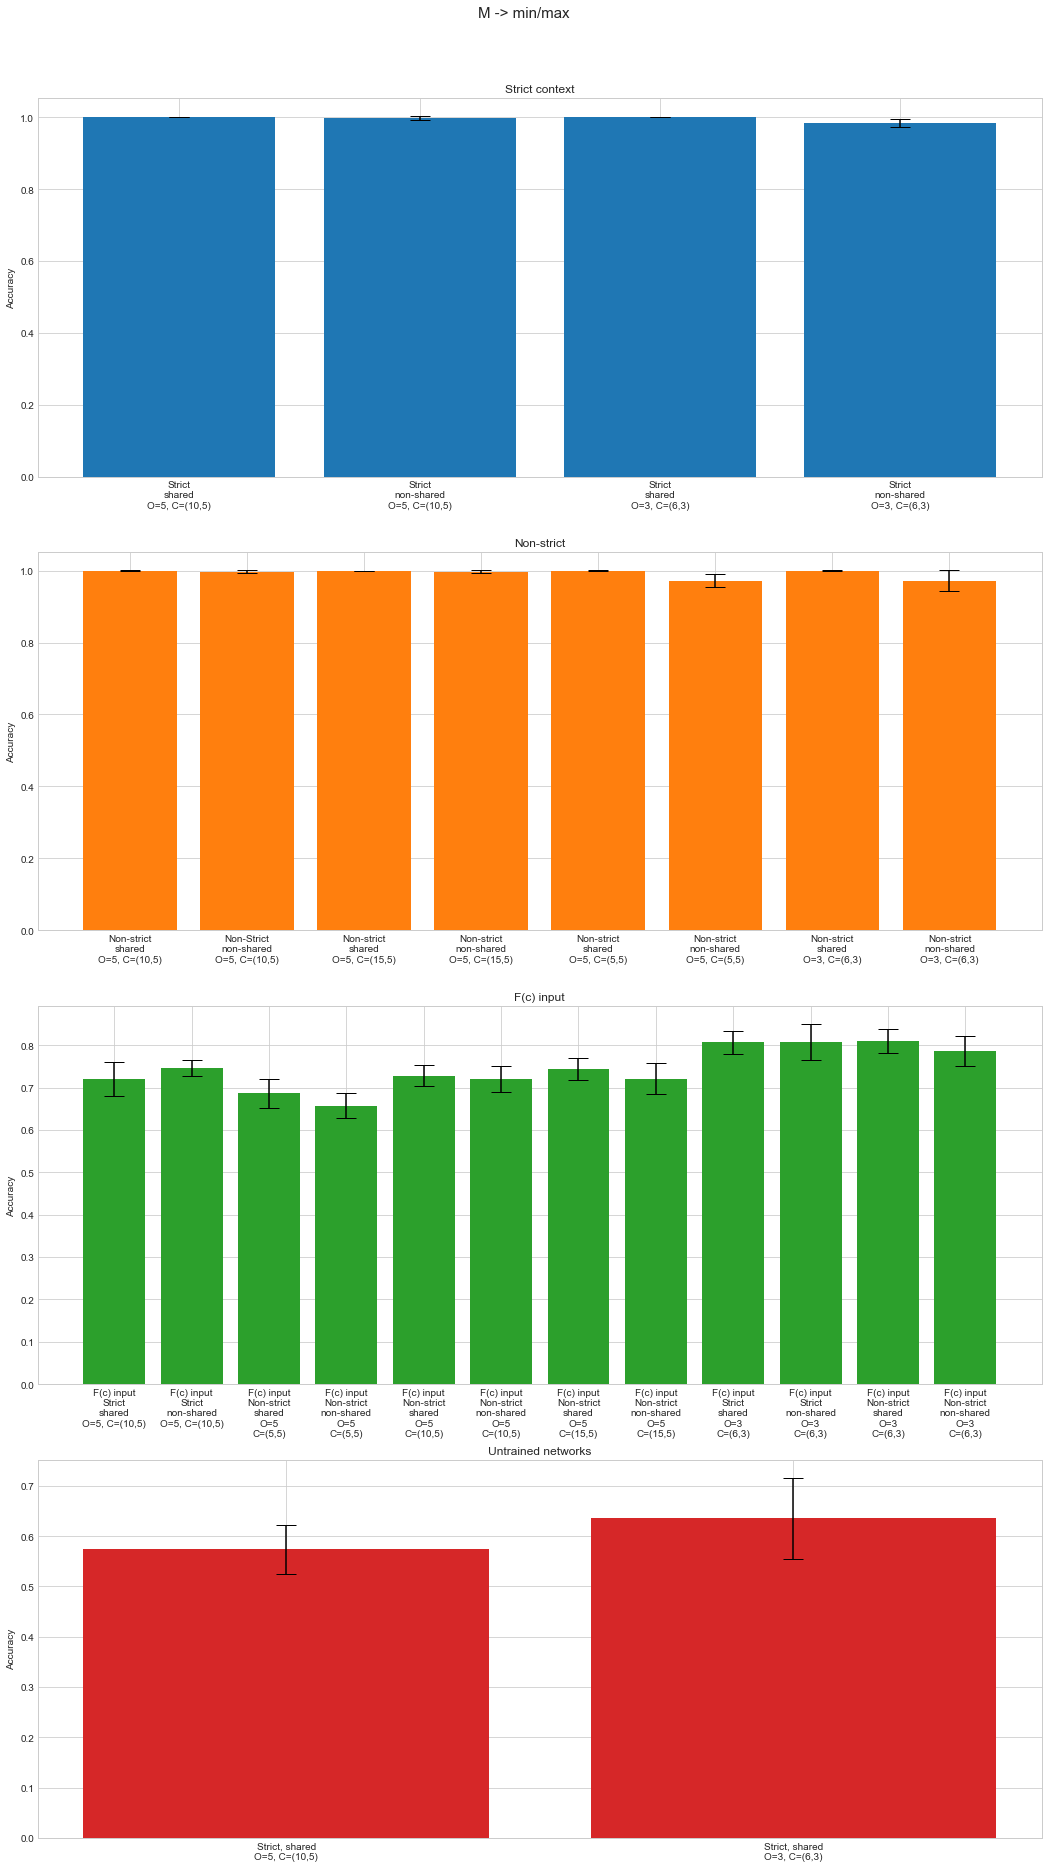

In [148]:
plot_bars_for_evaluation("min_max_from_messages", simulation_sets, "M -> min/max", "Accuracy")

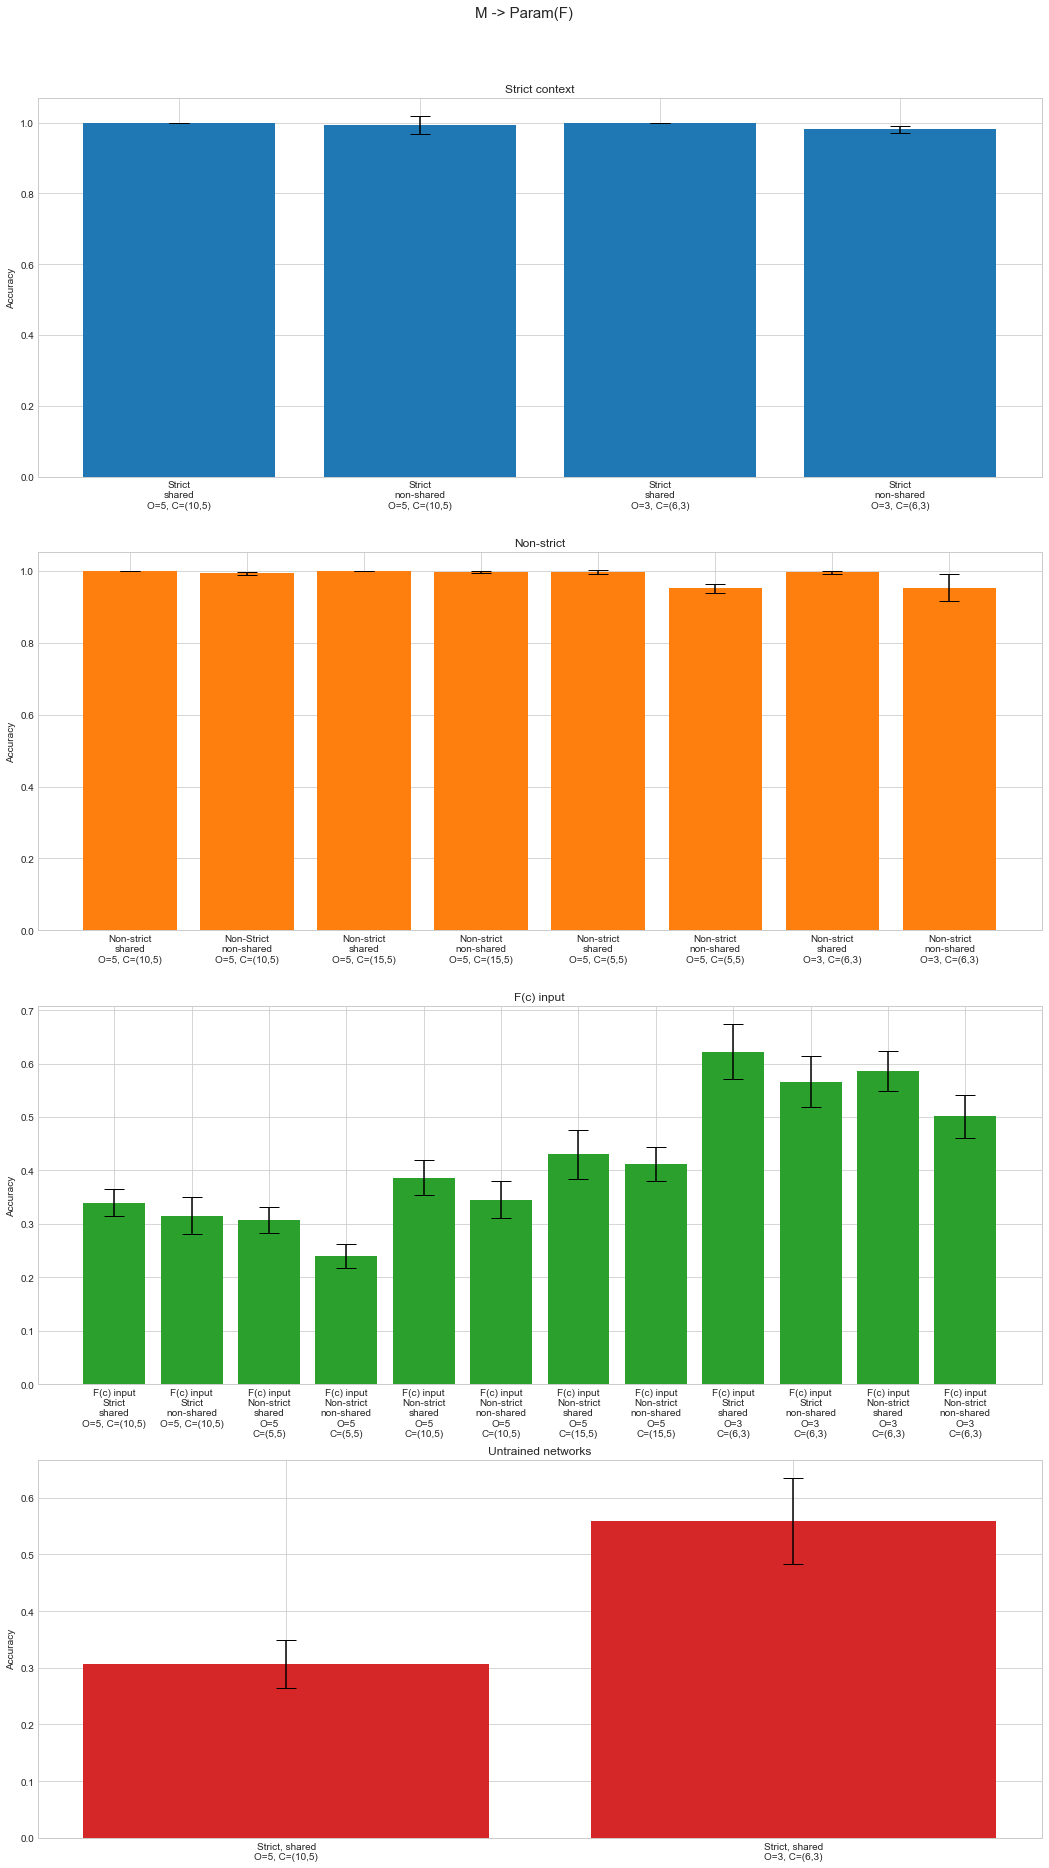

In [149]:
plot_bars_for_evaluation("dimension_from_messages", simulation_sets, "M -> Param(F)", "Accuracy")

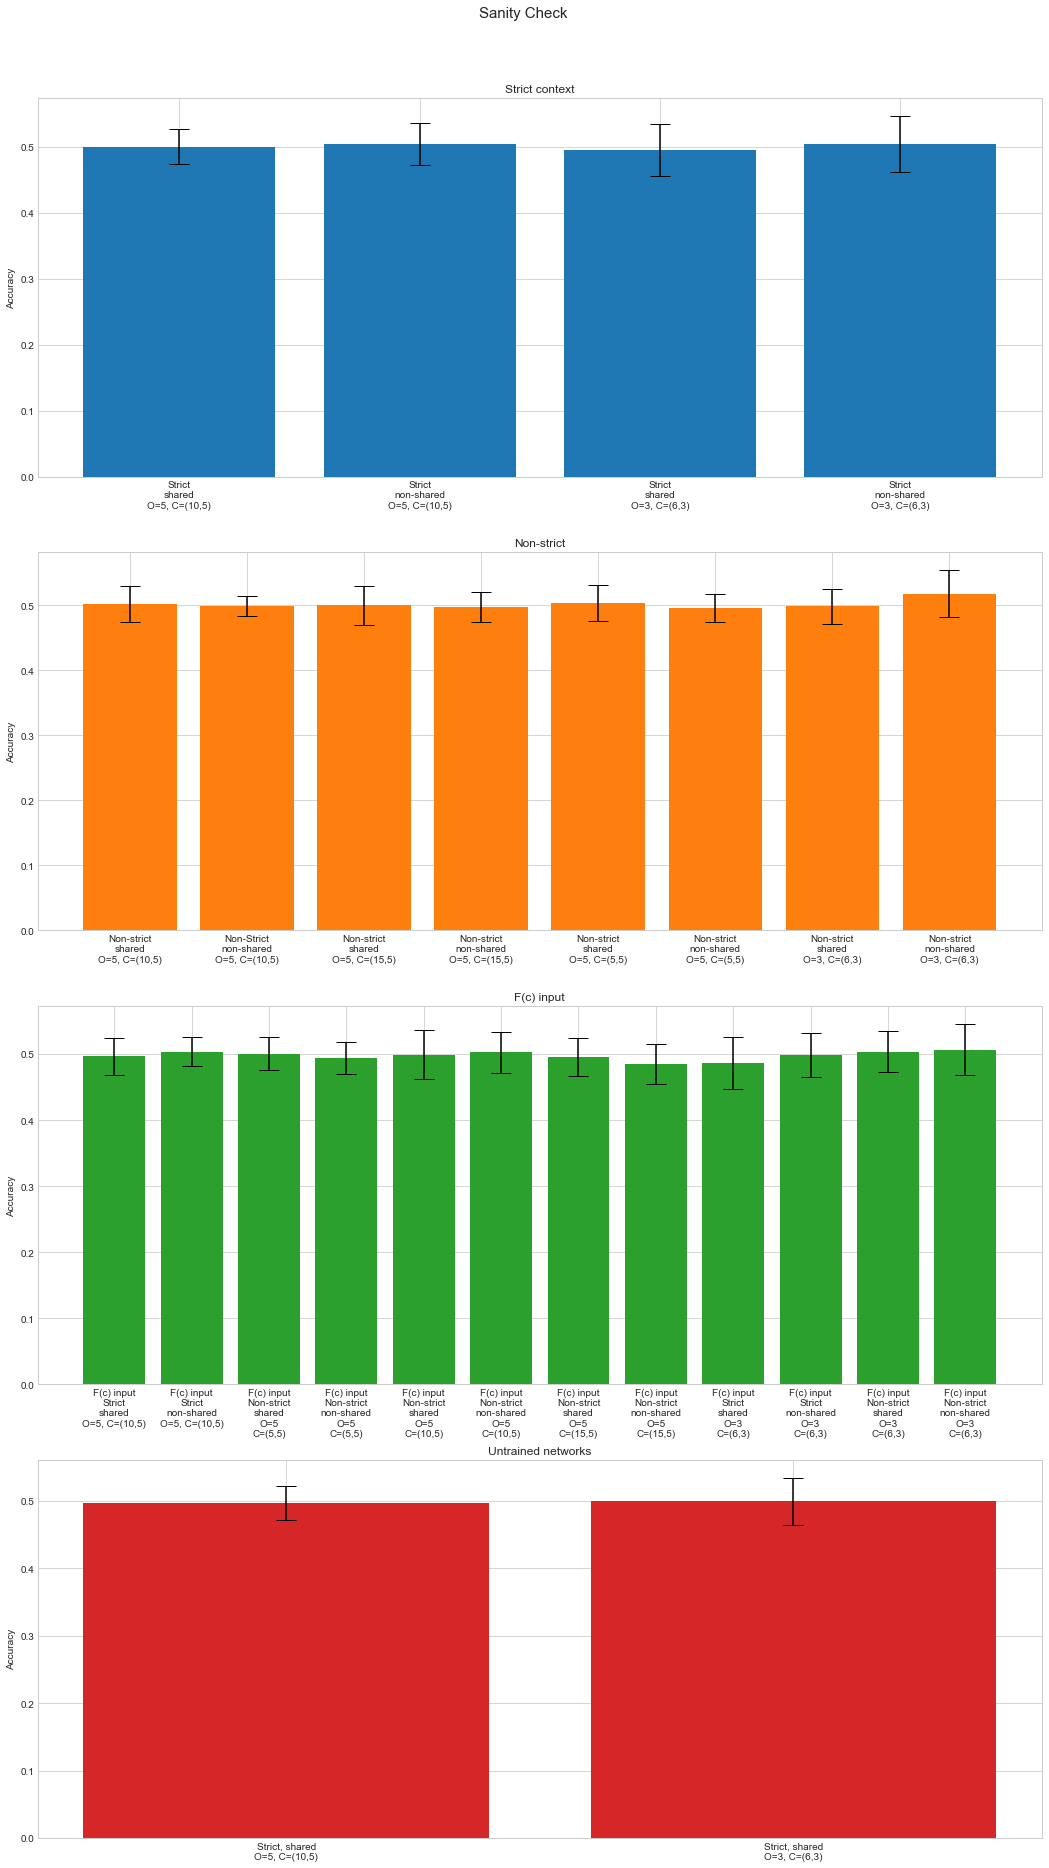

In [150]:
plot_bars_for_evaluation("sanity_from_messages", simulation_sets, "Sanity Check", "Accuracy")

## Training losses

### Shared vs. Non-shared

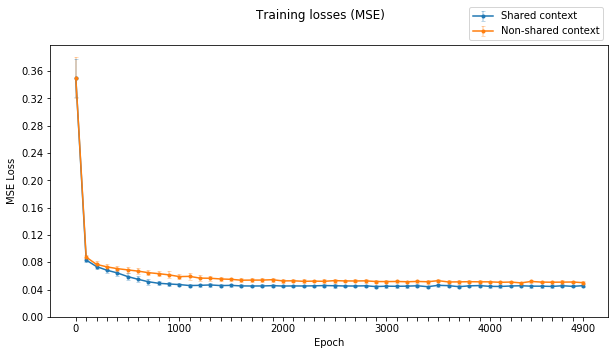

In [57]:
simulation_display_name_to_file_name = {
    "Shared context": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Non-shared context": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### First 50 epochs

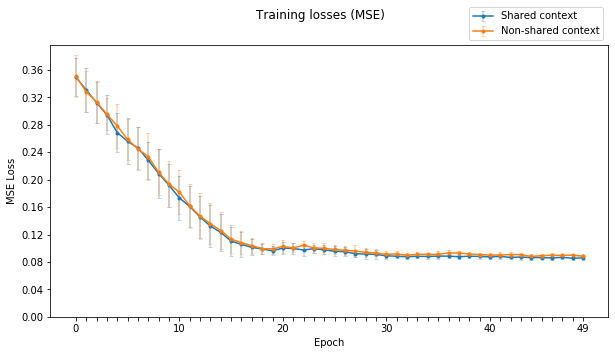

In [58]:
plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=50, epoch_interval=1, label_interval=10)

### Strict context, O=5

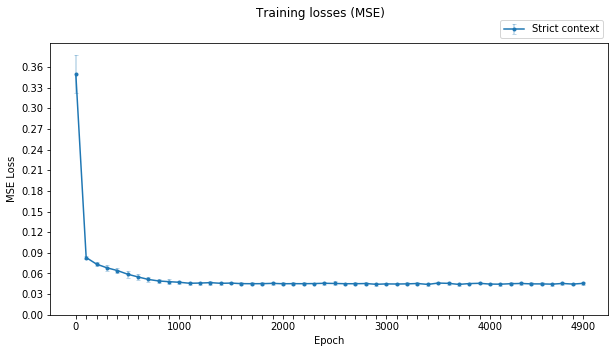

In [59]:
simulation_display_name_to_file_name = {
    "Strict context": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(15, 5)

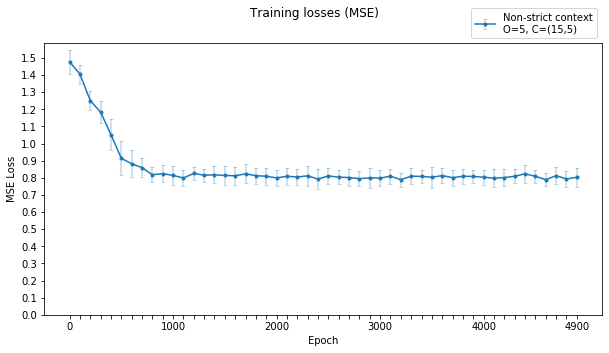

In [102]:
simulation_display_name_to_file_name = {
    "Non-strict context\nO=5, C=(15,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_15__mini_batch_size_128__num_batches_5000",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(10,5)

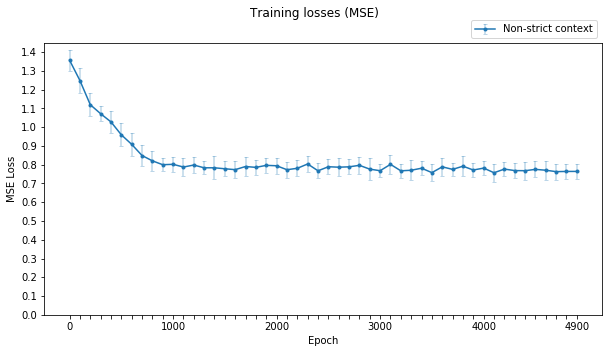

In [104]:
simulation_display_name_to_file_name = {
    "Non-strict context": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
} 
plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(5,5)

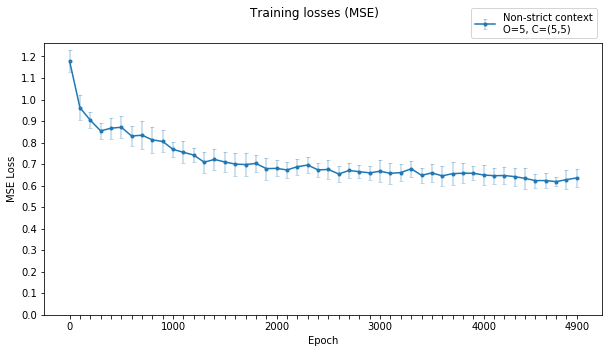

In [105]:
simulation_display_name_to_file_name = {
    "Non-strict context\nO=5, C=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

## Clustering

### Cluster-function F1-score

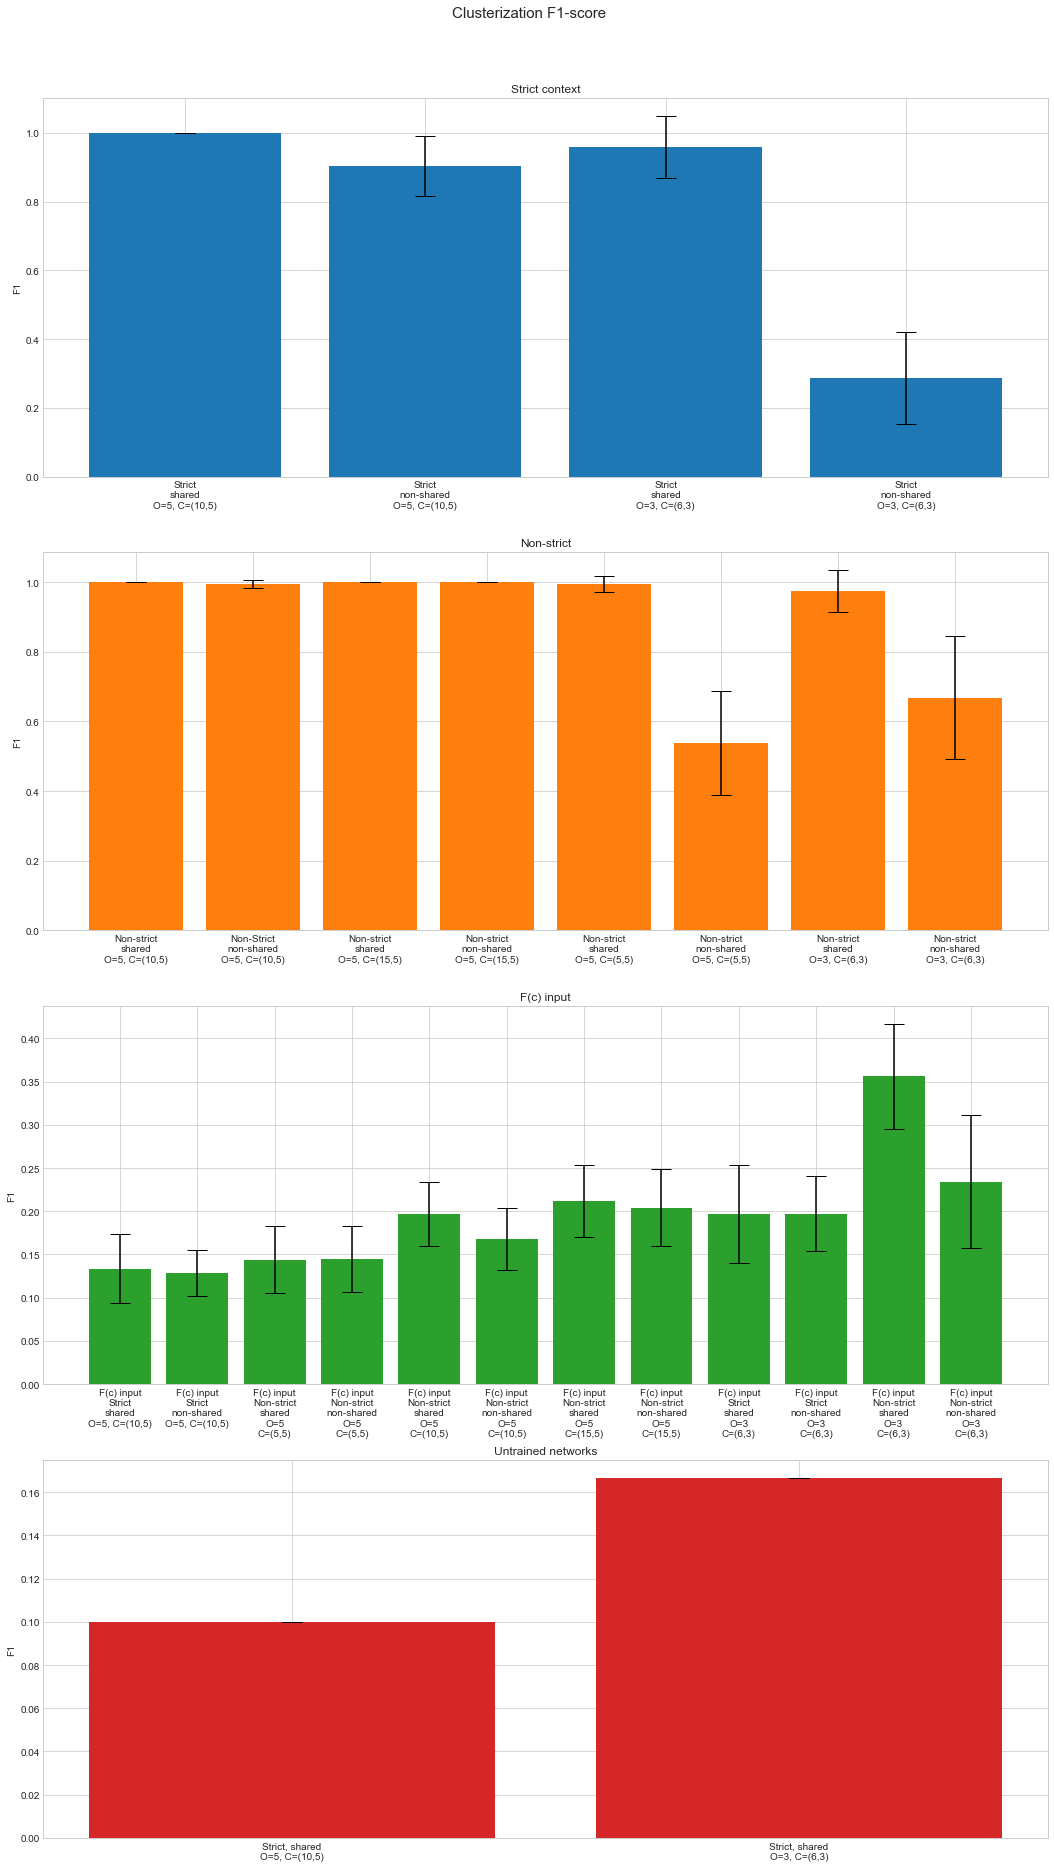

In [152]:
sets = {"Strict context": strict_context_simulations, 
        "Non-strict": non_strict_context_simulations, 
        "F(c) input": nature_includes_fc_simulations,
        "Untrained networks": untrained_simulations}
plot_bars_for_evaluation("clusterization_f_score", sets, "Clusterization F1-score", "F1")

### Prediction by cluster average message

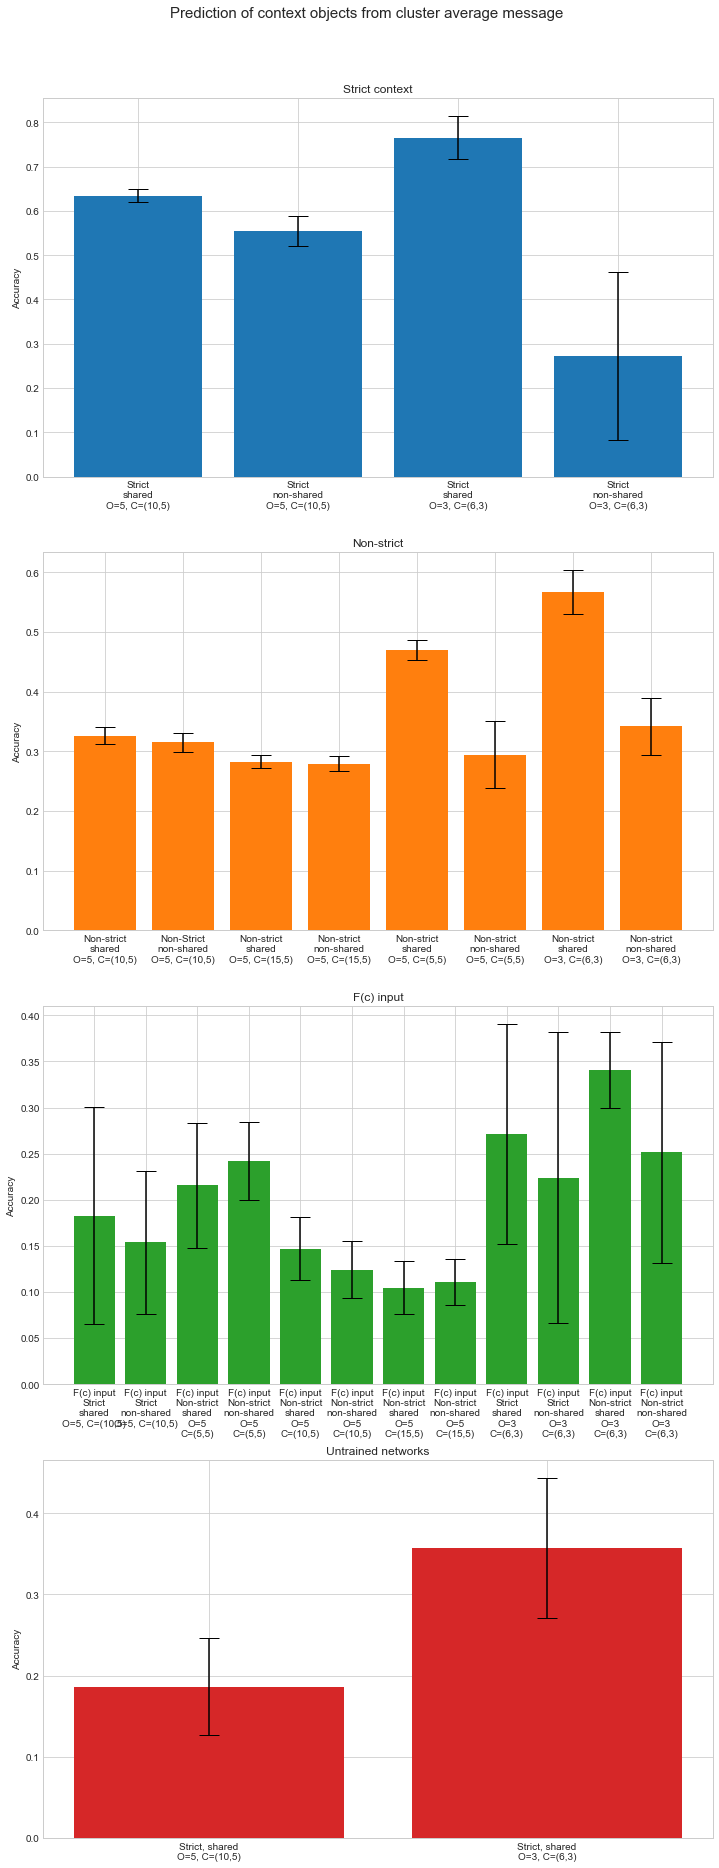

In [153]:
plot_bars_for_evaluation("predictions_by_average_msg_accuracy", 
                         sets, 
                         "Prediction of context objects from cluster average message", 
                         "Accuracy", 
                         width=12)

## Compositionality Tests

In [157]:
compositionality_test_to_evals = {
    "Compositionality as addition": {
        "loss_evals": {
            "Perception loss (O)": "addition_compositionality_mean_prediction_loss",
            "Production loss (M)": "addition_compositionality_mean_message_loss",
        },
        "accuracy_evals": {
            "Perception accuracy\n(O)": "addition_compositionality_mean_prediction_accuracy",
            "Production accuracy\n(M cluster)": "addition_compositionality_mean_message_cluster_accuracy",
        }
    },

    "Compositionality as analogy":  {       
        "loss_evals": {
            "Perception loss (O)": "analogy_compositionality_net_prediction_mean_loss",
            "Production loss (M)": "analogy_compositionality_net_message_mean_loss"
        },
        "accuracy_evals": {
            "Perception accuracy (O)": "analogy_compositionality_net_prediction_mean_accuracy",
            "Production accuracy\n(M cluster)": "analogy_compositionality_net_message_cluster_mean_accuracy"
        }
    },

    "Compositionality network": { 
        "loss_evals": {
            "Perception loss (O)": "addition_compositionality_mean_prediction_loss",
            "Production loss (M)": "addition_compositionality_mean_message_loss",
        },
        "accuracy_evals": {
            "Perception accuracy\n(O)": "addition_compositionality_mean_prediction_accuracy",
            "Production accuracy\n(M cluster)": "addition_compositionality_mean_message_cluster_accuracy",
        }
    }
}

def plot_all_compositionality_stats(simulation_name):
    for compo_test_name, evals in compositionality_test_to_evals.items():
        plot_compositionality(compo_test_name, simulation_name, evals["loss_evals"], evals["accuracy_evals"])

    
def plot_compositionality(title, simulation_name, loss_evals, accuracy_evals, message_size=2):
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    bar_width = 1

    for i, (display_name, eval_name) in enumerate(loss_evals.items()):
        mean, err = get_evaluation_mean_and_err(simulation_name, eval_name, message_size)
        ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

    for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
        mean, err = get_evaluation_mean_and_err(simulation_name, eval_name, message_size)
        ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

    ax[0].set_xticks(range(len(accuracy_evals)))
    ax[0].set_xticklabels(list(loss_evals.keys()))

    ax[1].set_xticks(range(len(loss_evals)))
    ax[1].set_xticklabels(list(accuracy_evals.keys()))

    ax[0].set_ylabel("MSE loss")
    ax[1].set_ylabel("Accuracy")
    fig.suptitle(title)
    plt.show()

### Strict, Shared context, O=5, Encoder input = <c, f>

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


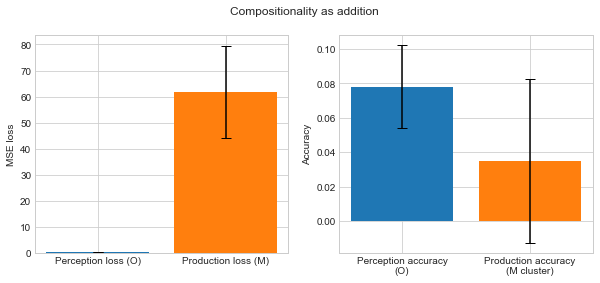

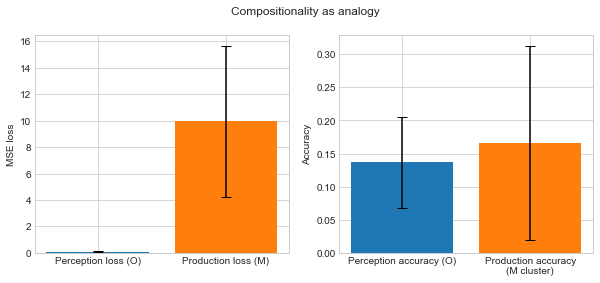

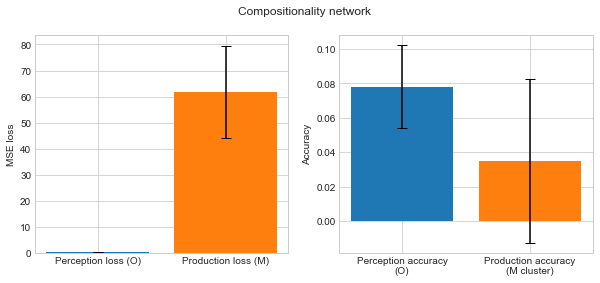

In [158]:
simulation = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Non-shared context, O=5, Encoder input = <c, f>

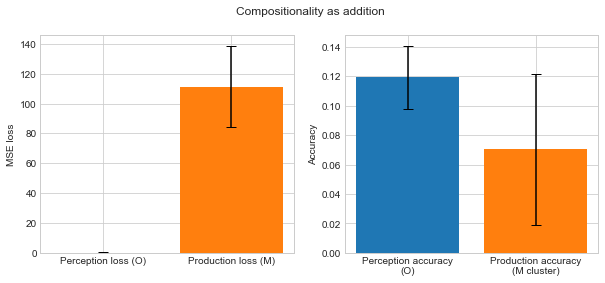

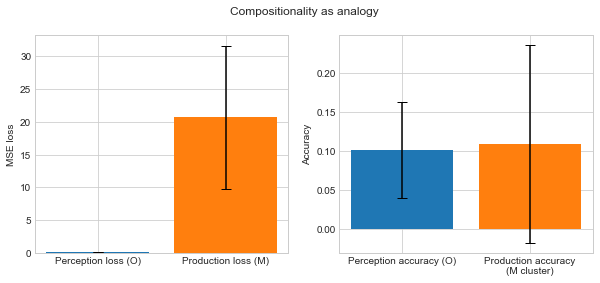

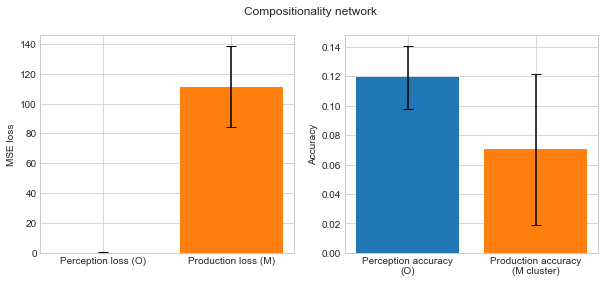

In [159]:
simulation = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Shared context, O=5, Encoder input = <c, f(c)>

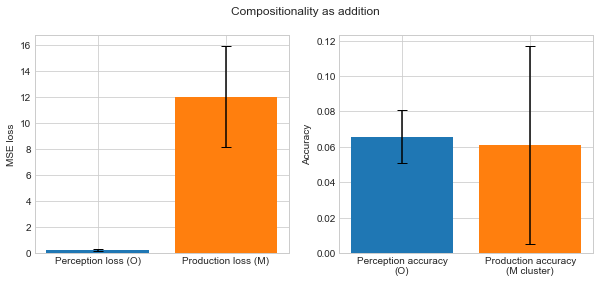

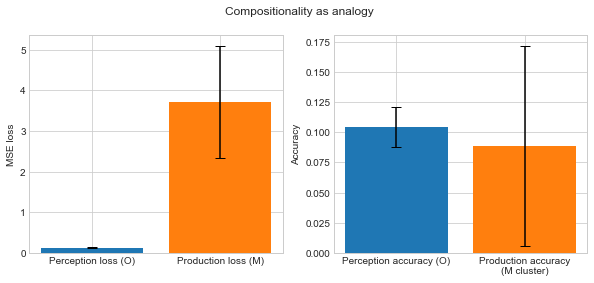

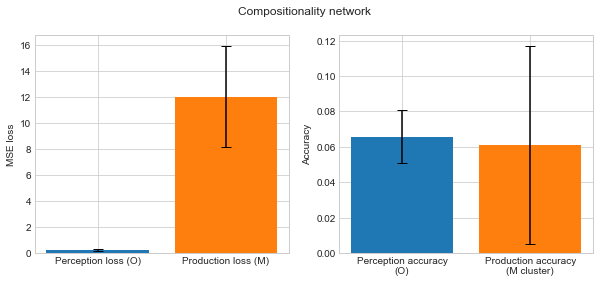

In [160]:
simulation = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Non-shared context, O=5, Encoder input = <c, f(c)>

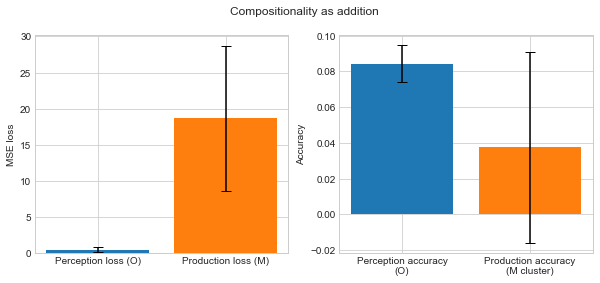

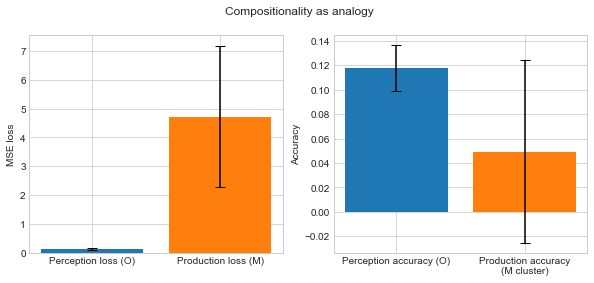

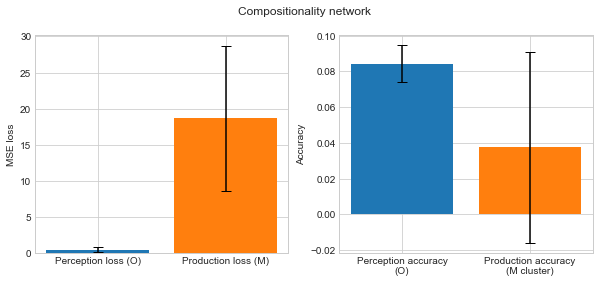

In [161]:
simulation="acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Shared context, O=3, Encoder input = <c, f>

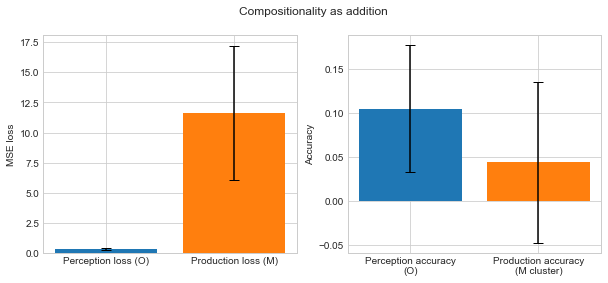

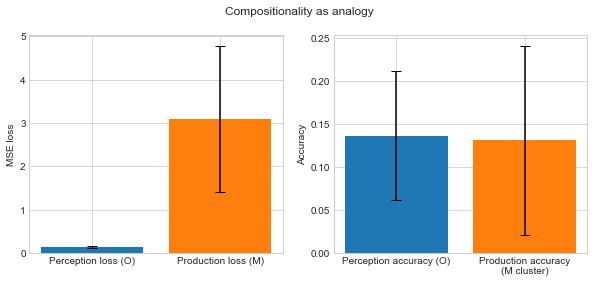

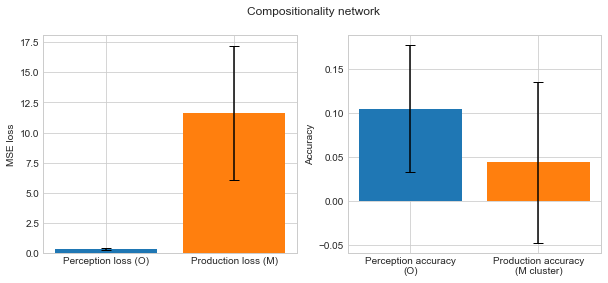

In [162]:
simulation="acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Non-shared context, O=3, Encoder input = <c, f>

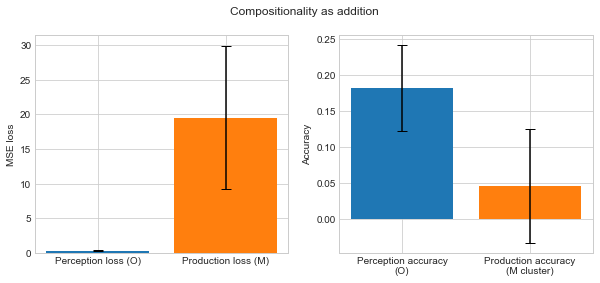

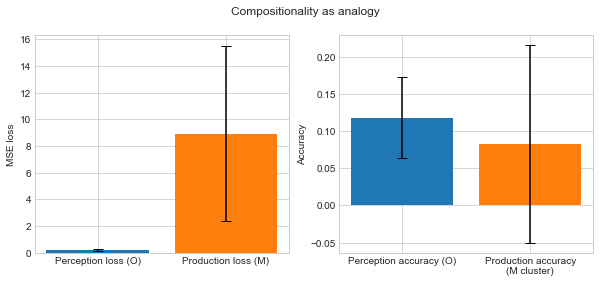

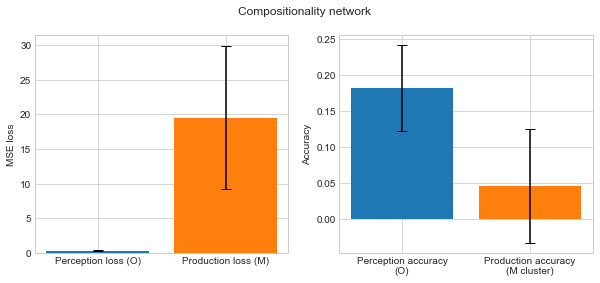

In [163]:
simulation="acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Shared context, O=3, Encoder input = <c, f(c)>

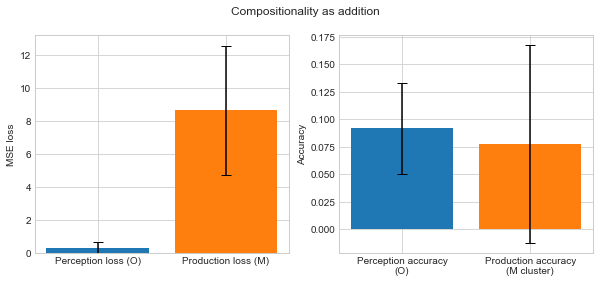

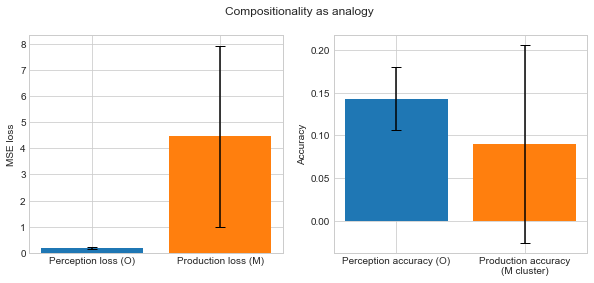

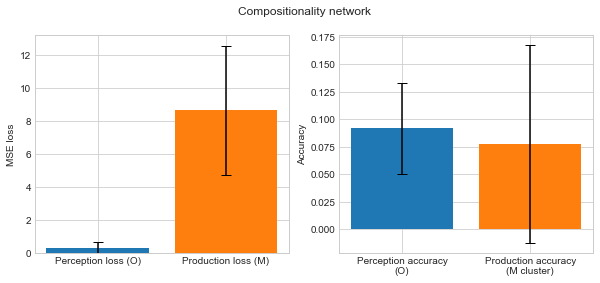

In [164]:
simulation="acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Strict, Non-shared context, O=3, Encoder input = <c, f(c)>

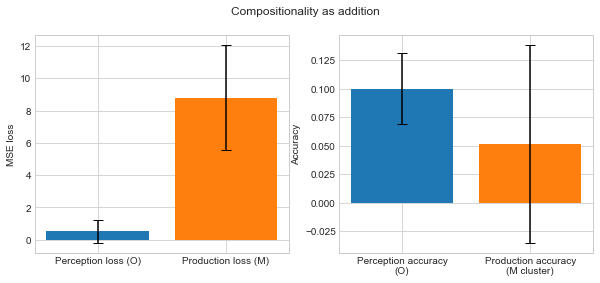

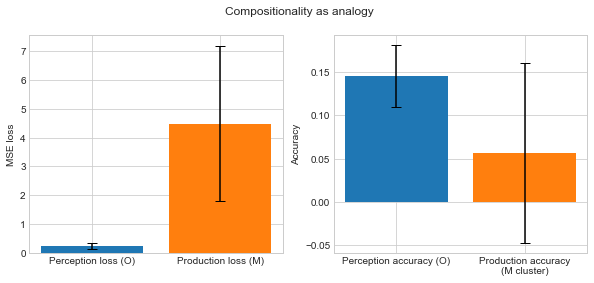

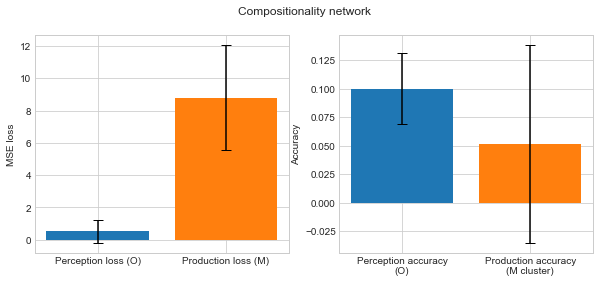

In [165]:
simulation="acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
plot_all_compositionality_stats(simulation)

### Untrained network

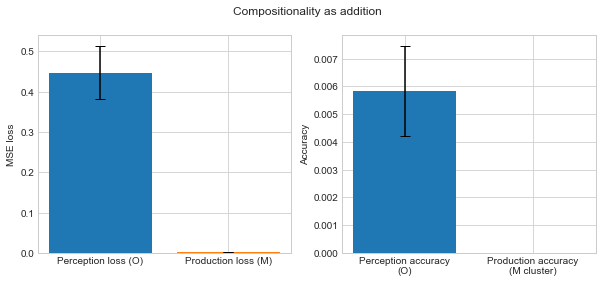

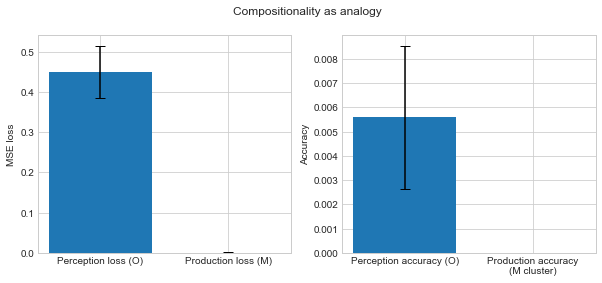

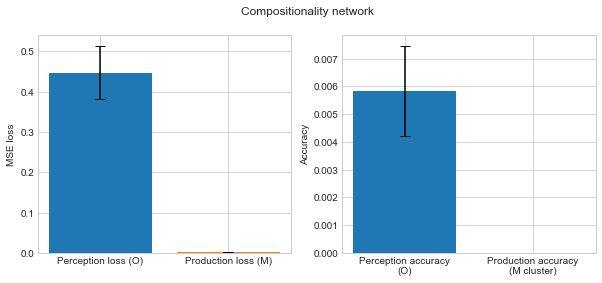

In [166]:
simulation="acl_ready/extremity_game_acl_untrained__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_0"
plot_all_compositionality_stats(simulation)

# Message visualizations

In [183]:
def visualize_messages(simulation_name, game_number=0):
    simulation = simulations.load_simulation(simulation_name)
    games=simulations.load_games(simulation_name)
    message_size = simulation.message_sizes[0]
    games[message_size][game_number]._plot_messages_information()

## Encoder input is <c, f>

### Strict, shared context, O=5

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


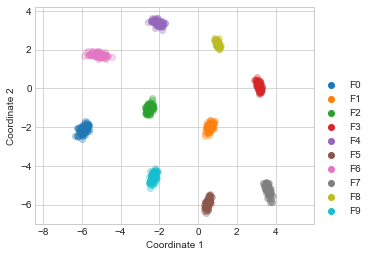

In [216]:
import utils
plt.style.use('seaborn-whitegrid')

simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### Strict, non-shared context, O=5

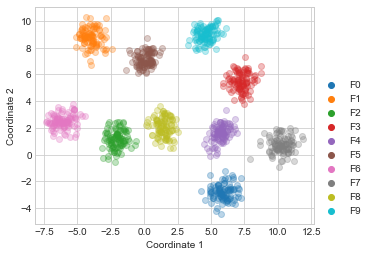

In [218]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name, 3)

In [ ]:
### Non-strict, non-shared, O=5, C=5

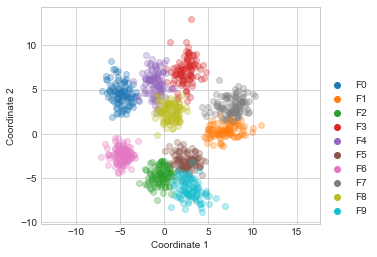

In [457]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_0__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name, 3)

## Encoder input is <c, f(c)>

### Strict, shared context, O=5

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


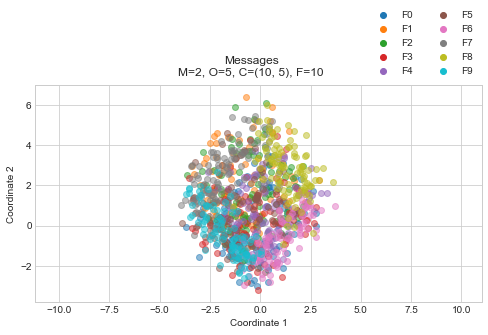

08-12-2019:01:21:26.559 INFO [game.py:311] Number of predicted clusters: 2


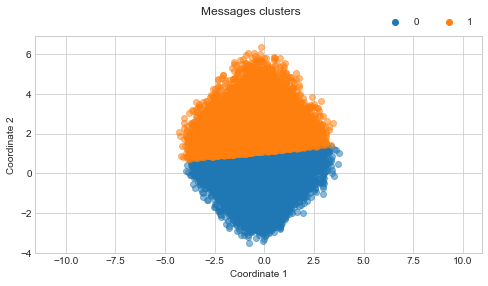

In [170]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=5, Non-shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


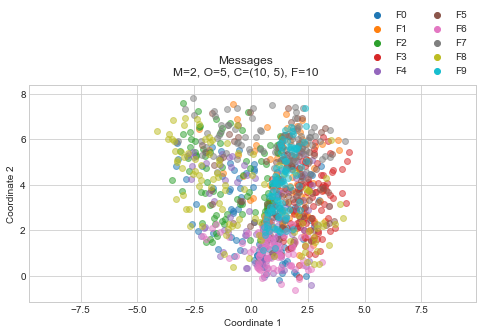

08-12-2019:01:21:28.581 INFO [game.py:311] Number of predicted clusters: 1


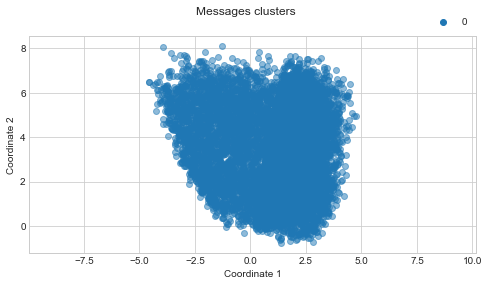

In [171]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=3, Shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


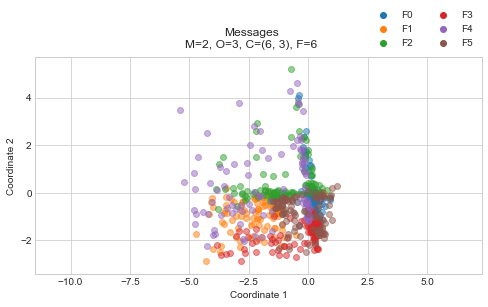

08-12-2019:01:21:30.367 INFO [game.py:311] Number of predicted clusters: 2


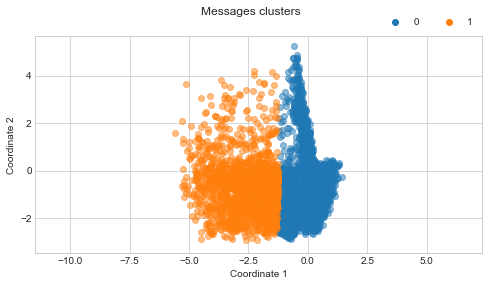

In [172]:
simulation_name = "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=3, Non-shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


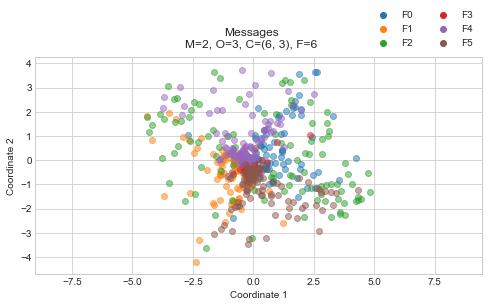

08-12-2019:01:21:31.681 INFO [game.py:311] Number of predicted clusters: 2


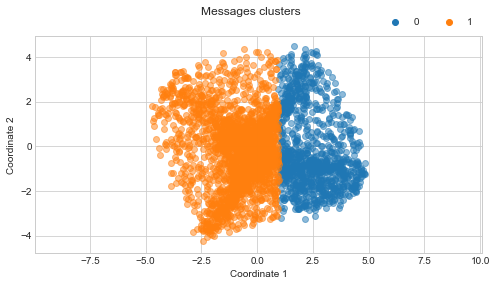

In [173]:
simulation_name = "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

## Encoder input is <c, f>

### Non-shared context

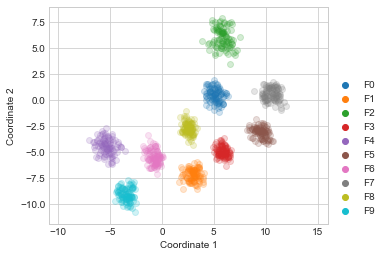

In [214]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### Untrained network, O=5

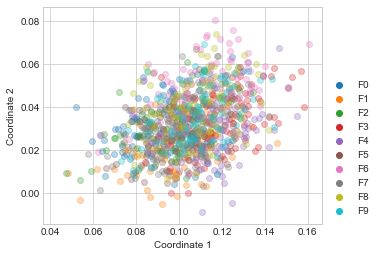

In [225]:
simulation_name = "acl_ready/extremity_game_acl_untrained__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_0"
visualize_messages(simulation_name, 6)

### Untrained network, O=3

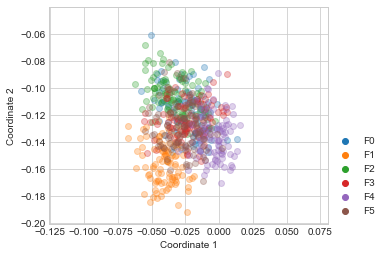

In [219]:
simulation_name = "acl_ready/extremity_game_acl_untrained__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_0"
visualize_messages(simulation_name)